In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [5]:
train_df = pd.read_csv(r"C:\Users\LENOVO\Documents\Hackathons\Xavier\ott_train.csv")
test_df = pd.read_csv(r"C:\Users\LENOVO\Documents\Hackathons\Xavier\ott_test.csv")

In [4]:
train_df

,user_id,tenure_days,subscription_tier,avg_daily_minutes_last_7d,avg_daily_minutes_last_30d,sessions_last_7d,sessions_last_30d,avg_completion_rate,unique_genres_watched_30d,days_since_last_session,binge_sessions_last_30d,peak_hour_viewing_pct,original_content_pct,recommendation_click_rate,fatigue_label
0,U006253,74,Basic,0.0,5.0,3,13,0.050,4,2,0,87.8,27.4,0.020,1
1,U004685,268,Standard,0.0,5.0,2,8,0.065,1,2,0,90.6,30.5,0.209,0
2,U001732,176,Basic,66.0,76.7,8,34,0.446,1,5,0,29.9,71.3,0.218,0
3,U004743,7,Premium,78.0,105.1,6,23,0.509,5,2,1,58.3,46.0,0.175,0
4,U004522,154,Premium,71.1,75.2,4,17,0.380,6,6,2,95.0,79.6,0.171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,U001639,880,Standard,102.6,100.6,8,32,0.638,4,0,1,48.5,55.3,0.479,0
7996,U005892,158,Standard,0.0,5.0,5,21,0.383,3,0,1,84.9,72.9,0.234,1
7997,U007428,66,Basic,11.1,12.9,6,24,0.199,8,2,0,77.3,37.7,0.189,0
7998,U000609,126,Standard,86.8,64.9,6,24,0.448,2,2,4,65.5,31.8,0.218,0


fatigue_label

0 = Engaged: The user is maintaining healthy platform usage and is
not at risk

1 = Fatigued: The user shows declining engagement patterns and isat high risk of reducing usage or cancelling within the next 30 days

In [8]:
print("Training dataset shape : ",train_df.shape)
print("Testing dataset shape : ",test_df.shape)
print("Columns in training datset : ",train_df.columns.to_list())
print("Training dataset dtypes : ",train_df.dtypes)

Training dataset shape :  (8000, 15)
Testing dataset shape :  (2000, 14)
Columns in training datset :  ['user_id', 'tenure_days', 'subscription_tier', 'avg_daily_minutes_last_7d', 'avg_daily_minutes_last_30d', 'sessions_last_7d', 'sessions_last_30d', 'avg_completion_rate', 'unique_genres_watched_30d', 'days_since_last_session', 'binge_sessions_last_30d', 'peak_hour_viewing_pct', 'original_content_pct', 'recommendation_click_rate', 'fatigue_label']
Training dataset dtypes :  user_id                        object
tenure_days                     int64
subscription_tier              object
avg_daily_minutes_last_7d     float64
avg_daily_minutes_last_30d    float64
sessions_last_7d                int64
sessions_last_30d               int64
avg_completion_rate           float64
unique_genres_watched_30d       int64
days_since_last_session         int64
binge_sessions_last_30d         int64
peak_hour_viewing_pct         float64
original_content_pct          float64
recommendation_click_rate  

In [ ]:
print("Missing values in train_df",train_df.isnull().sum())


Missing values in train_df user_id                       0
tenure_days                   0
subscription_tier             0
avg_daily_minutes_last_7d     0
avg_daily_minutes_last_30d    0
sessions_last_7d              0
sessions_last_30d             0
avg_completion_rate           0
unique_genres_watched_30d     0
days_since_last_session       0
binge_sessions_last_30d       0
peak_hour_viewing_pct         0
original_content_pct          0
recommendation_click_rate     0
fatigue_label                 0
dtype: int64


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     8000 non-null   object 
 1   tenure_days                 8000 non-null   int64  
 2   subscription_tier           8000 non-null   object 
 3   avg_daily_minutes_last_7d   8000 non-null   float64
 4   avg_daily_minutes_last_30d  8000 non-null   float64
 5   sessions_last_7d            8000 non-null   int64  
 6   sessions_last_30d           8000 non-null   int64  
 7   avg_completion_rate         8000 non-null   float64
 8   unique_genres_watched_30d   8000 non-null   int64  
 9   days_since_last_session     8000 non-null   int64  
 10  binge_sessions_last_30d     8000 non-null   int64  
 11  peak_hour_viewing_pct       8000 non-null   float64
 12  original_content_pct        8000 non-null   float64
 13  recommendation_click_rate   8000 

In [15]:
train_df.describe()

,tenure_days,avg_daily_minutes_last_7d,avg_daily_minutes_last_30d,sessions_last_7d,sessions_last_30d,avg_completion_rate,unique_genres_watched_30d,days_since_last_session,binge_sessions_last_30d,peak_hour_viewing_pct,original_content_pct,recommendation_click_rate,fatigue_label
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,175.120000,57.301225,60.913325,5.191625,21.056750,0.386099,3.899875,1.919375,1.562750,71.464062,45.645900,0.205143,0.353875
std,173.333432,40.711911,46.459145,2.536328,10.580573,0.178038,2.194243,2.499481,1.553822,15.796410,19.511728,0.128562,0.478201
min,7.000000,0.000000,5.000000,0.000000,0.000000,0.050000,1.000000,0.000000,0.000000,9.800000,1.100000,0.020000,0.000000
25%,51.000000,25.700000,23.675000,3.000000,13.000000,0.252000,2.000000,0.000000,0.000000,61.000000,30.700000,0.104000,0.000000
50%,121.000000,53.900000,53.400000,5.000000,20.000000,0.372000,4.000000,1.000000,1.000000,73.400000,45.000000,0.197000,0.000000
75%,242.000000,84.225000,87.900000,7.000000,28.000000,0.509000,5.000000,3.000000,2.000000,83.900000,60.300000,0.292000,1.000000
max,1095.000000,214.800000,300.000000,17.000000,75.000000,0.977000,15.000000,30.000000,11.000000,95.000000,90.000000,0.695000,1.000000


In [20]:
print("No. of duplicates : ",train_df.duplicated().sum())

No. of duplicates :  0


In [22]:
print("No. of duplicate user ids :",train_df['user_id'].duplicated().sum())

No. of duplicate user ids : 0


In [29]:
for column in train_df.select_dtypes(include=['object','category']).columns:
    print(column,":\n" , train_df[column].value_counts(),"\n")

user_id :
 user_id
U003303    1
U007858    1
U007231    1
U001509    1
U007796    1
          ..
U004522    1
U004743    1
U001732    1
U004685    1
U006253    1
Name: count, Length: 8000, dtype: int64 

subscription_tier :
 subscription_tier
Standard    4033
Basic       2328
Premium     1639
Name: count, dtype: int64 



In [33]:
vc_fatigue = train_df['fatigue_label'].value_counts()
print(vc_fatigue)
print(f"Fatigue rate : {vc_fatigue[1]/len(train_df)*100:.2f}%")

fatigue_label
0    5169
1    2831
Name: count, dtype: int64
Fatigue rate : 35.39%


In [38]:
# Logical consistency check
inconsistent = train_df[train_df['sessions_last_7d'] > train_df['sessions_last_30d']]
print(f'sessions_last_7d > sessions_last_30d: {len(inconsistent)} rows')
print("*"*80)
# Contradiction check
weird = train_df[(train_df['sessions_last_30d']==0) & (train_df['days_since_last_session']==0)]
print(f'0 sessions but 0 days since last session: {len(weird)}')
print("*"*80)
# Fatigue rate by subscription tier
print(train_df.groupby('subscription_tier')['fatigue_label'].mean().round(3))
print("*"*80)
# Fatigue rate by tenure bucket
train_df['tenure_bucket'] = pd.cut(train_df['tenure_days'], 
                                 bins=[0,30,90,180,365,1095], 
                                 labels=['0-30d','30-90d','90-180d','180-365d','365d+'])
print("User leave after number of days :",train_df.groupby('tenure_bucket', observed=True)['fatigue_label'].mean().round(3))
print("*"*80)
# Mean feature values split by label (MOST IMPORTANT)
numeric_cols = ['avg_daily_minutes_last_7d','avg_daily_minutes_last_30d',
                'sessions_last_7d','sessions_last_30d','avg_completion_rate',
                'days_since_last_session','binge_sessions_last_30d',
                'recommendation_click_rate','unique_genres_watched_30d']
print(train_df.groupby('fatigue_label')[numeric_cols].mean().round(3).T)
print("*"*80)

sessions_last_7d > sessions_last_30d: 0 rows
********************************************************************************
0 sessions but 0 days since last session: 29
********************************************************************************
subscription_tier
Basic       0.382
Premium     0.311
Standard    0.355
Name: fatigue_label, dtype: float64
********************************************************************************
User leave after number of days : tenure_bucket
0-30d       0.392
30-90d      0.344
90-180d     0.376
180-365d    0.334
365d+       0.317
Name: fatigue_label, dtype: float64
********************************************************************************
fatigue_label                    0       1
avg_daily_minutes_last_7d   66.340  40.798
avg_daily_minutes_last_30d  69.229  45.730
sessions_last_7d             5.736   4.199
sessions_last_30d           23.314  16.935
avg_completion_rate          0.425   0.315
days_since_last_session      1.445   2.786
bin

Visualizations :

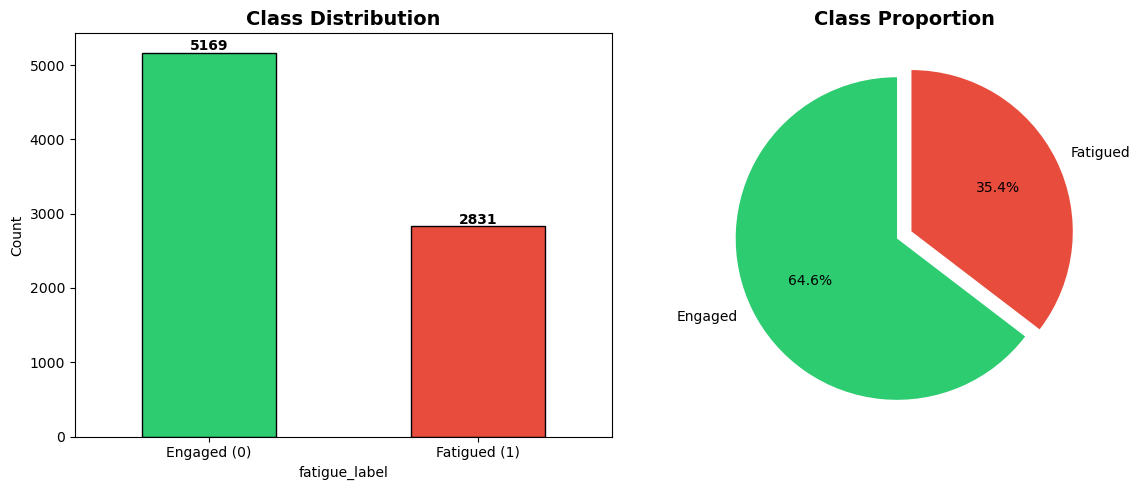

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
train_df['fatigue_label'].value_counts().plot(kind='bar', ax=axes[0], 
                                            color=['#2ecc71','#e74c3c'], 
                                            edgecolor='black')
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Engaged (0)', 'Fatigued (1)'], rotation=0)
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width()/2, p.get_height()+30), 
                     ha='center', fontweight='bold')

# Pie chart
axes[1].pie(train_df['fatigue_label'].value_counts(), 
            labels=['Engaged', 'Fatigued'], 
            autopct='%1.1f%%', 
            colors=['#2ecc71','#e74c3c'],
            startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('01_class_balance.png', dpi=150)
plt.show()

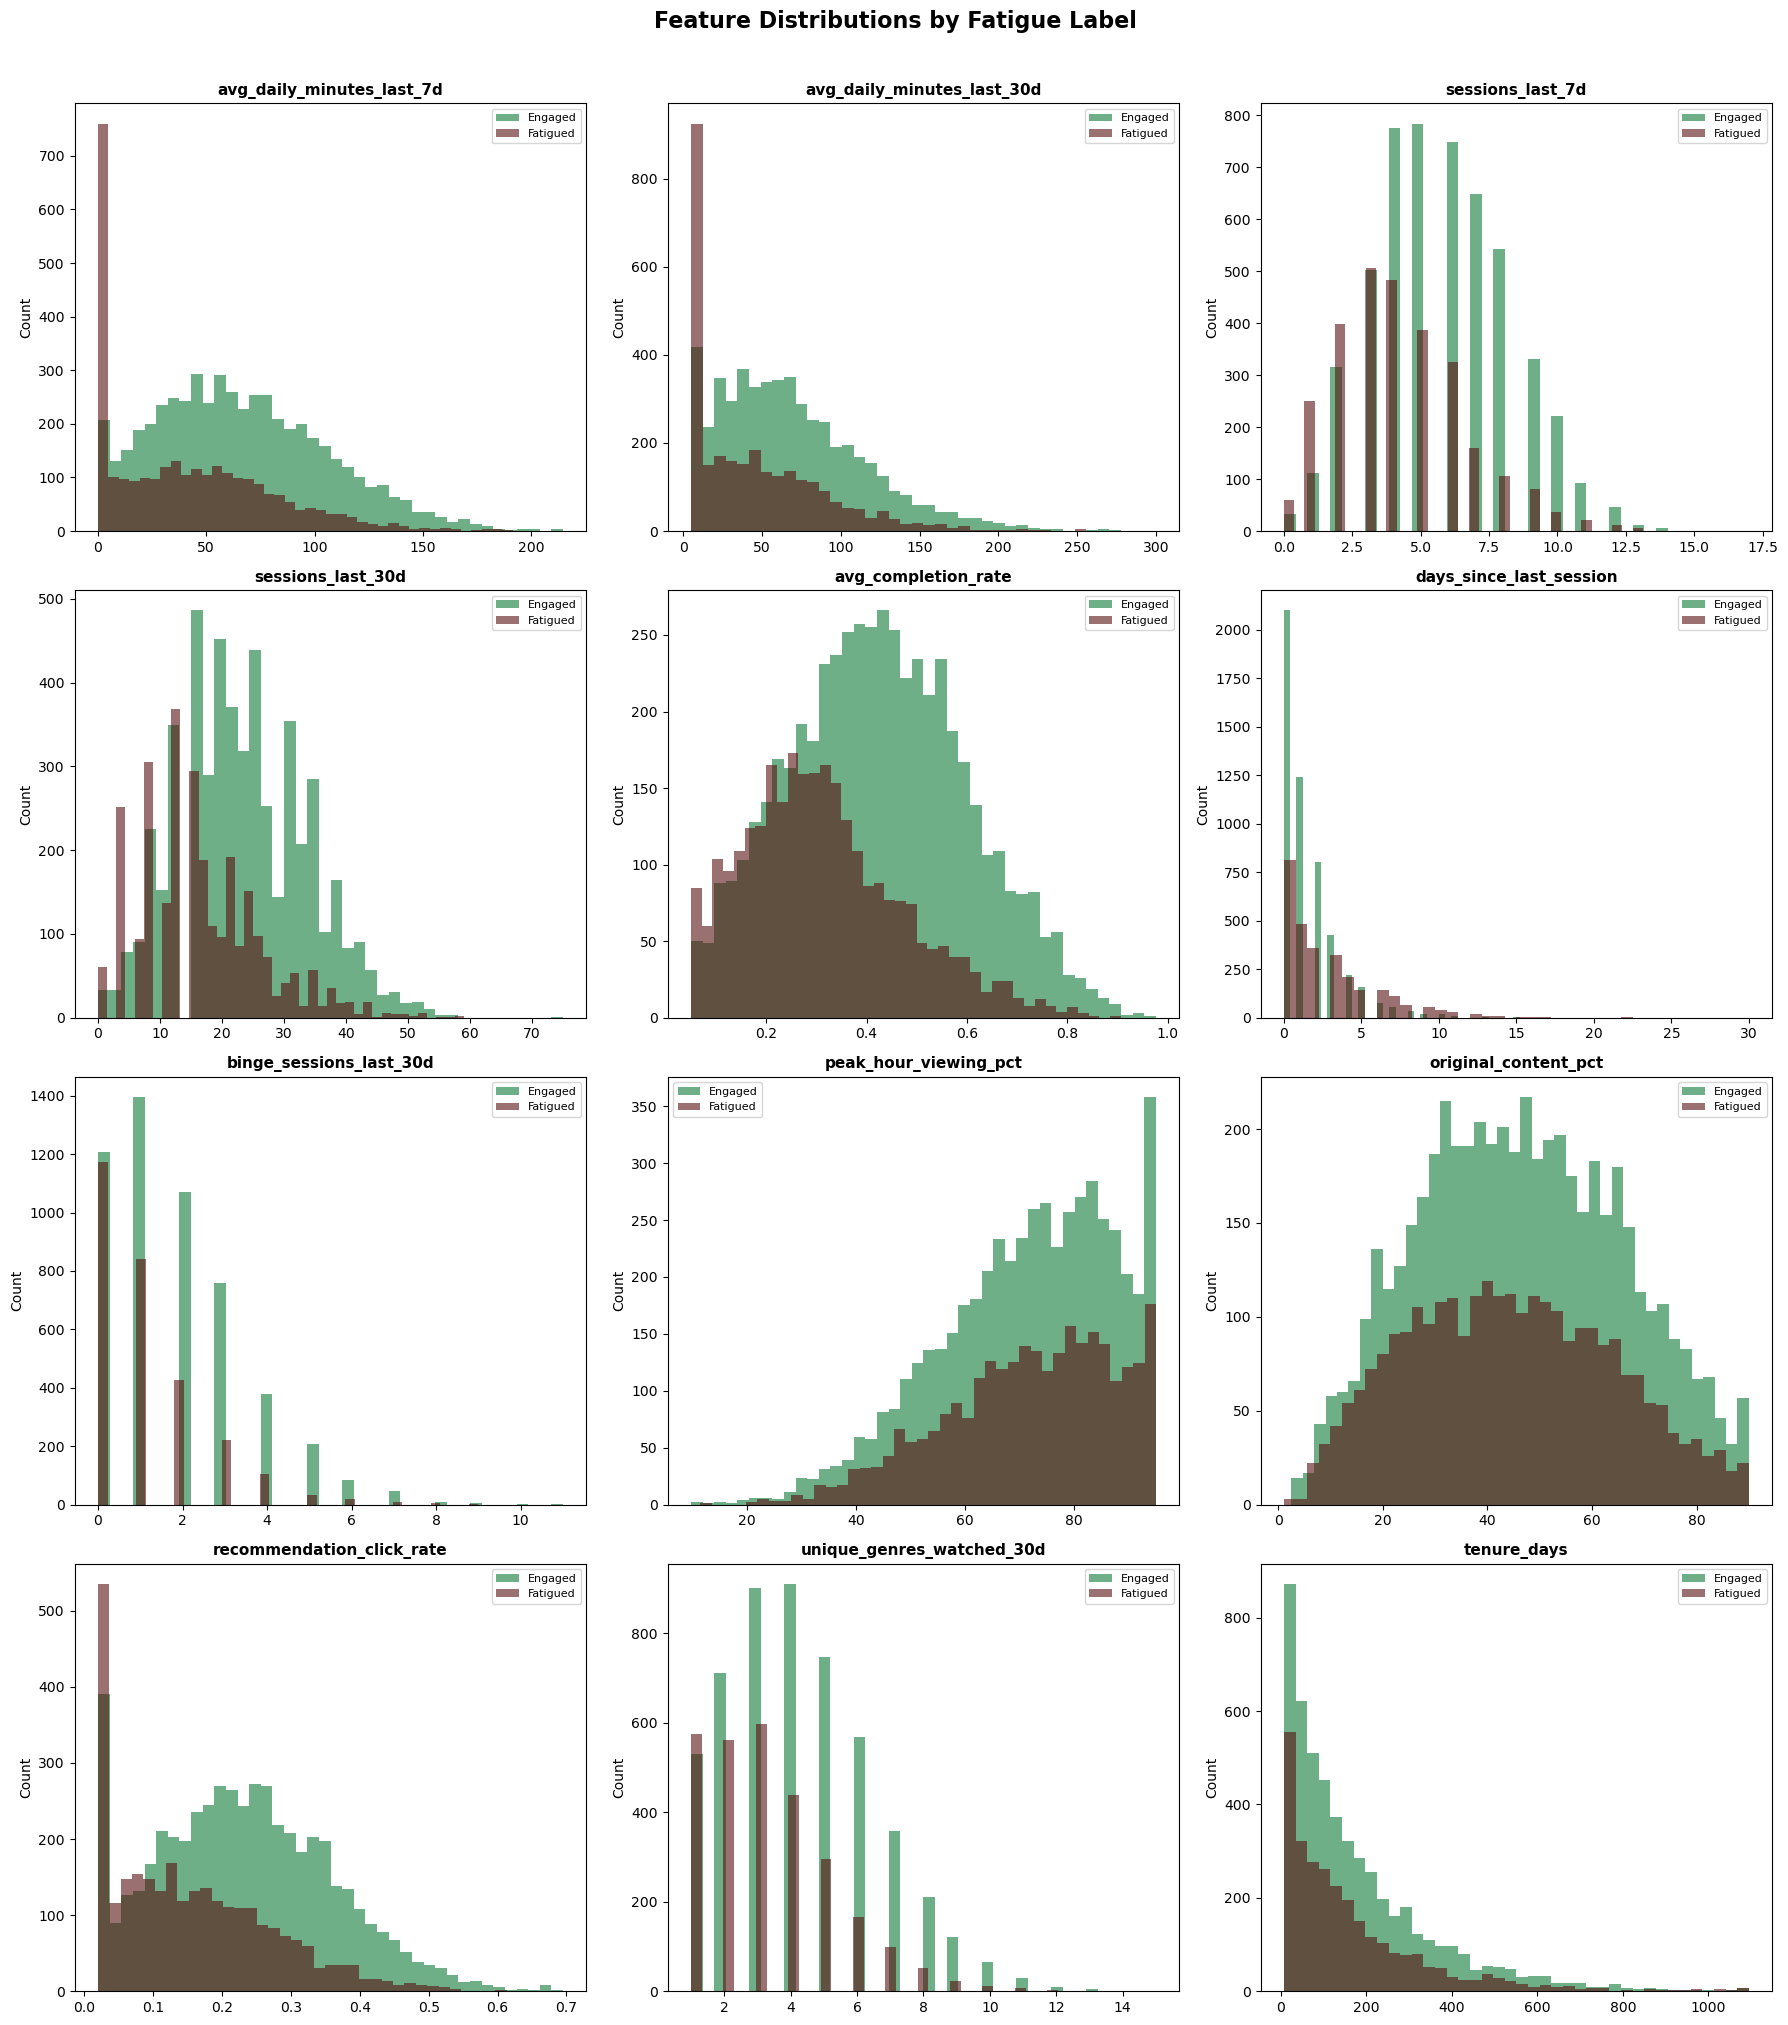

In [46]:
numeric_cols = ['avg_daily_minutes_last_7d', 'avg_daily_minutes_last_30d',
                'sessions_last_7d', 'sessions_last_30d', 'avg_completion_rate',
                'days_since_last_session', 'binge_sessions_last_30d',
                'peak_hour_viewing_pct', 'original_content_pct',
                'recommendation_click_rate', 'unique_genres_watched_30d', 'tenure_days']

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    for label, color, name in zip([0,1], ["#0D7A38","#581111"], ['Engaged','Fatigued']):
        axes[i].hist(train_df[train_df['fatigue_label']==label][col], 
                     bins=40, alpha=0.6, color=color, label=name, edgecolor='none')
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].legend(fontsize=8)
    axes[i].set_ylabel('Count')

plt.suptitle('Feature Distributions by Fatigue Label', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('02_feature_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

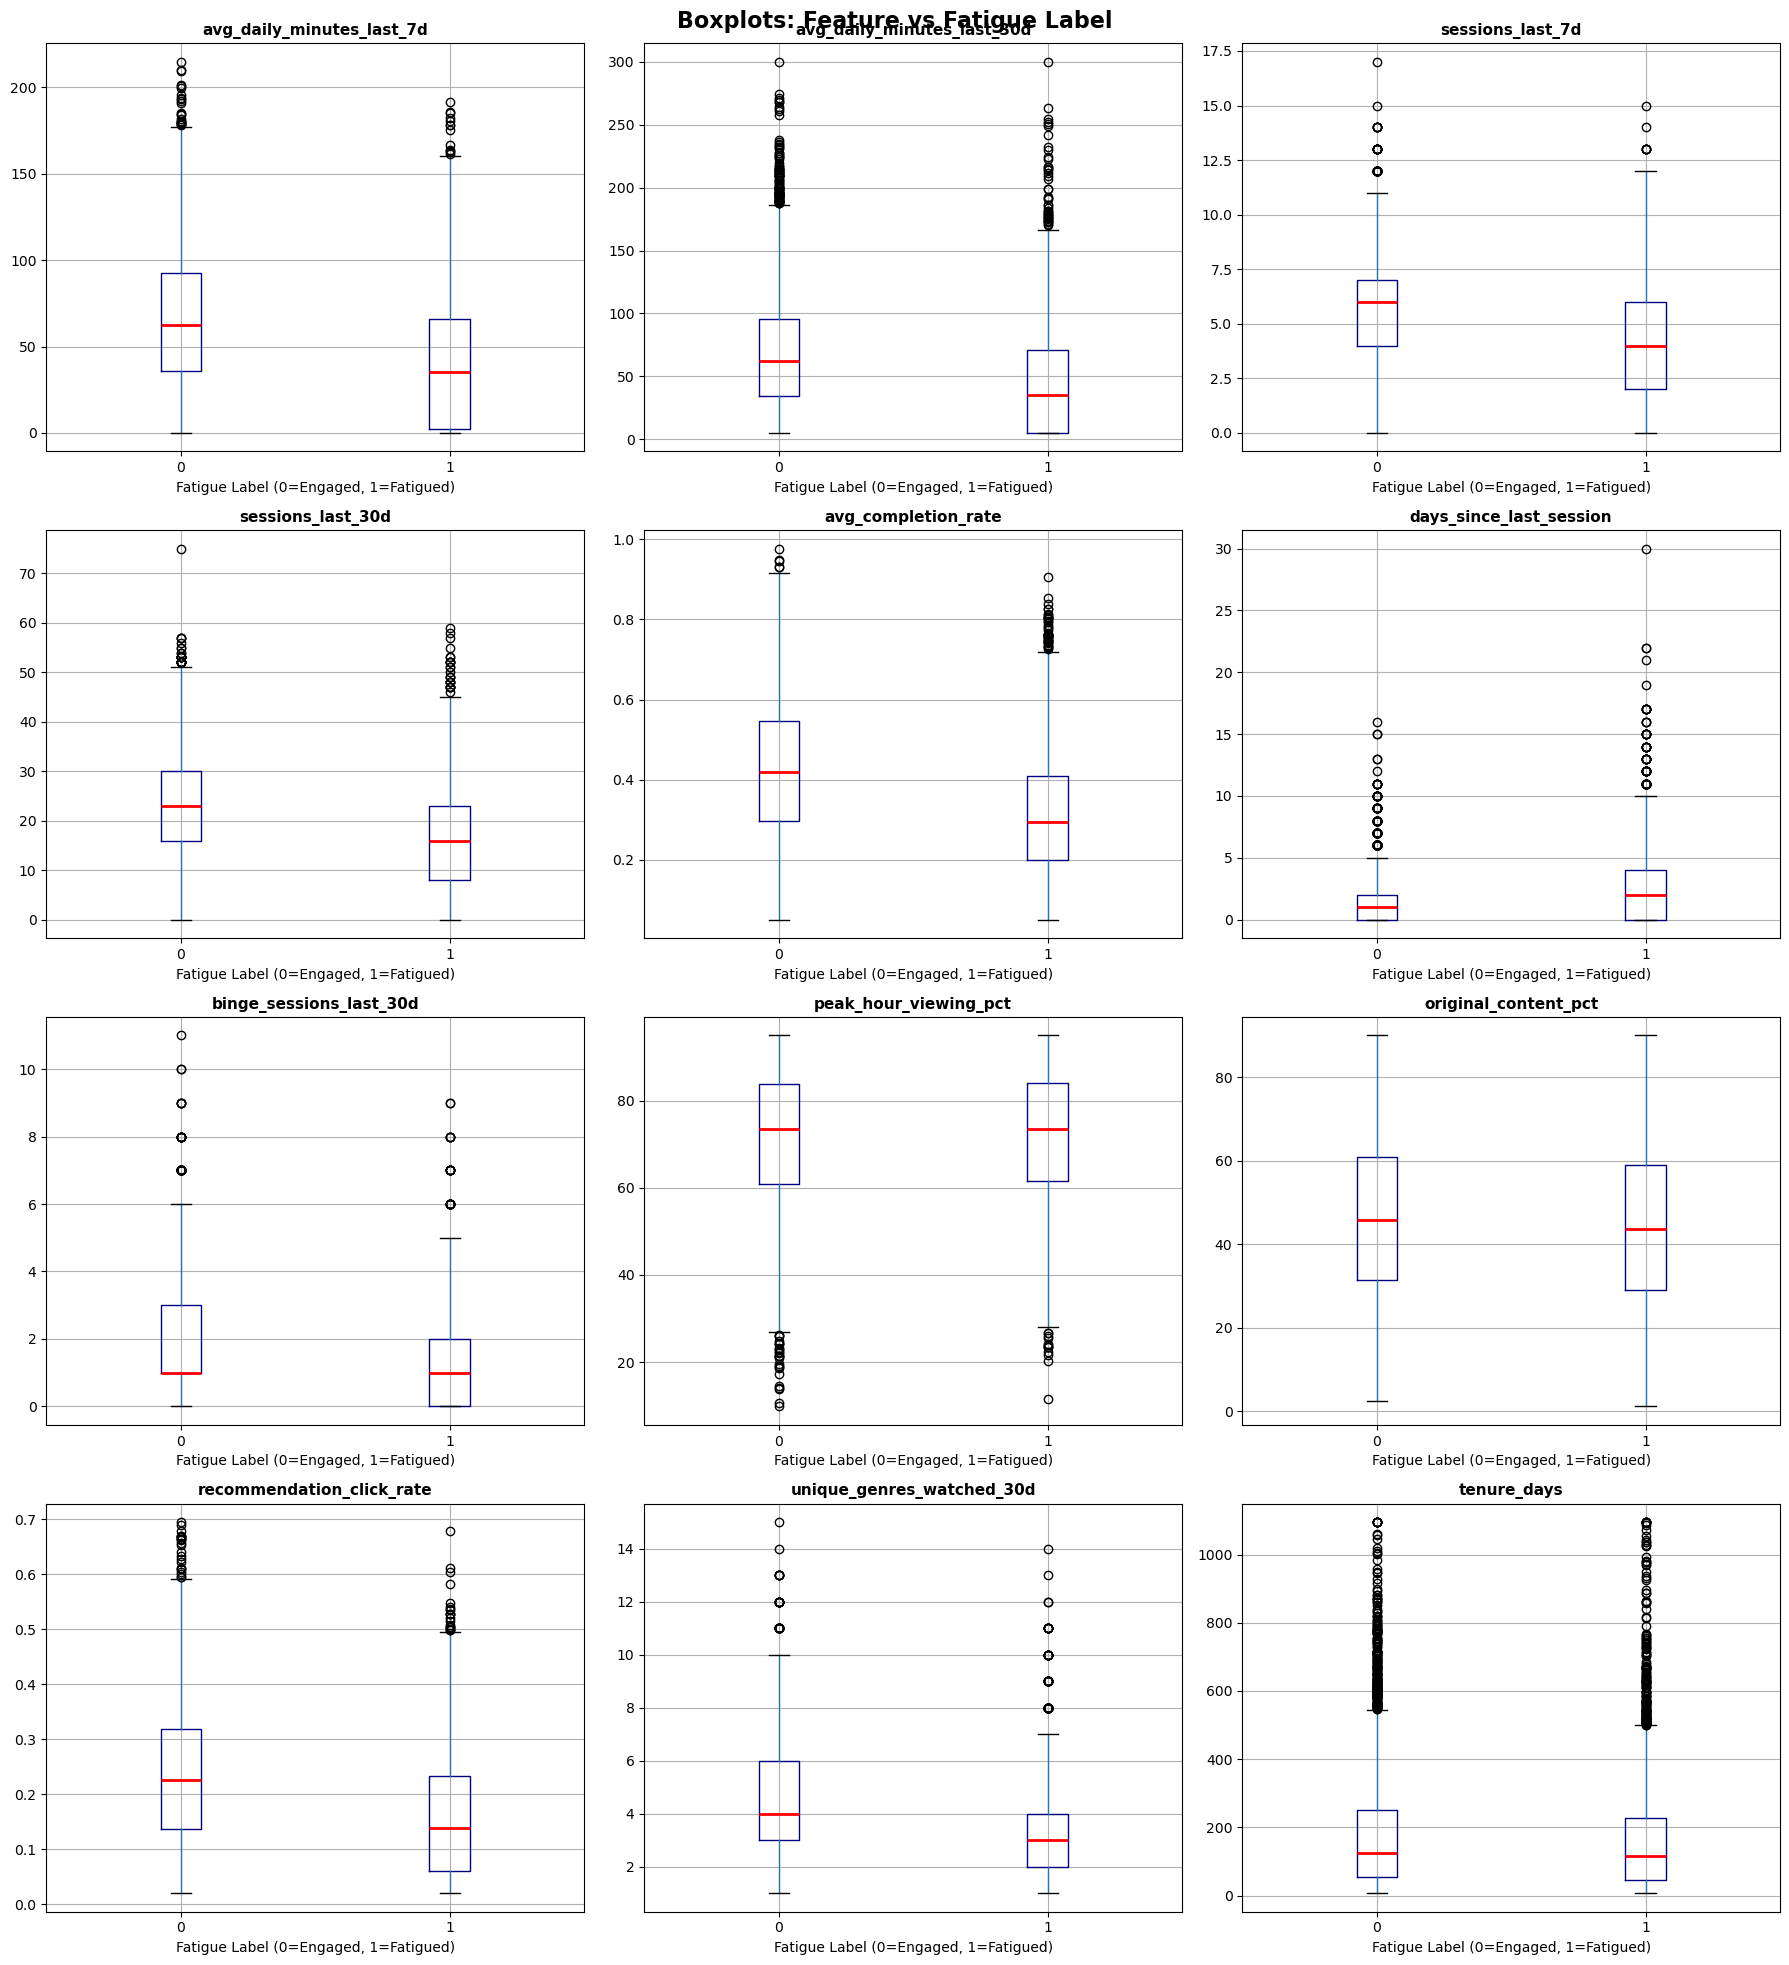

In [47]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    train_df.boxplot(column=col, by='fatigue_label', ax=axes[i],
                  boxprops=dict(color='navy'),
                  medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Fatigue Label (0=Engaged, 1=Fatigued)')
    axes[i].set_ylabel('')

plt.suptitle('Boxplots: Feature vs Fatigue Label', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('03_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

--> Clear median separation on avg_completion_rate, avg_daily_minutes, sessions, recommendation_click_rate

--> peak_hour_viewing_pct and original_content_pct boxes almost identical for both classes — likely low importance features

--> tenure_days also shows almost no separation

 

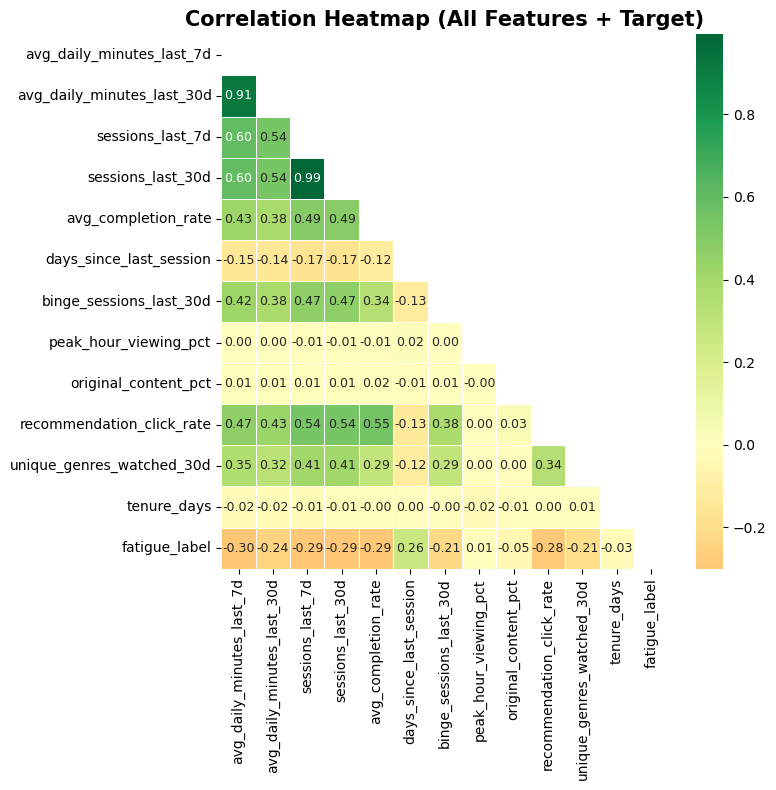

In [51]:
plt.figure(figsize=(8, 8))

corr = train_df[numeric_cols + ['fatigue_label']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0,
            linewidths=0.5, linecolor='white',
            annot_kws={'size': 9})

plt.title('Correlation Heatmap (All Features + Target)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('04_correlation_heatmap.png', dpi=150)
plt.show()

days_since_last_session is the strongest positive predictor of fatigue (+0.26)

avg_daily_minutes_last_7d, avg_completion_rate, sessions_last_7d/30d, recommendation_click_rate are all negatively correlated with fatigue (~-0.28 to -0.30)

sessions_last_7d and sessions_last_30d are nearly perfectly correlated (0.99) — multicollinearity risk

peak_hour_viewing_pct and original_content_pct show near-zero correlation — weak predictors

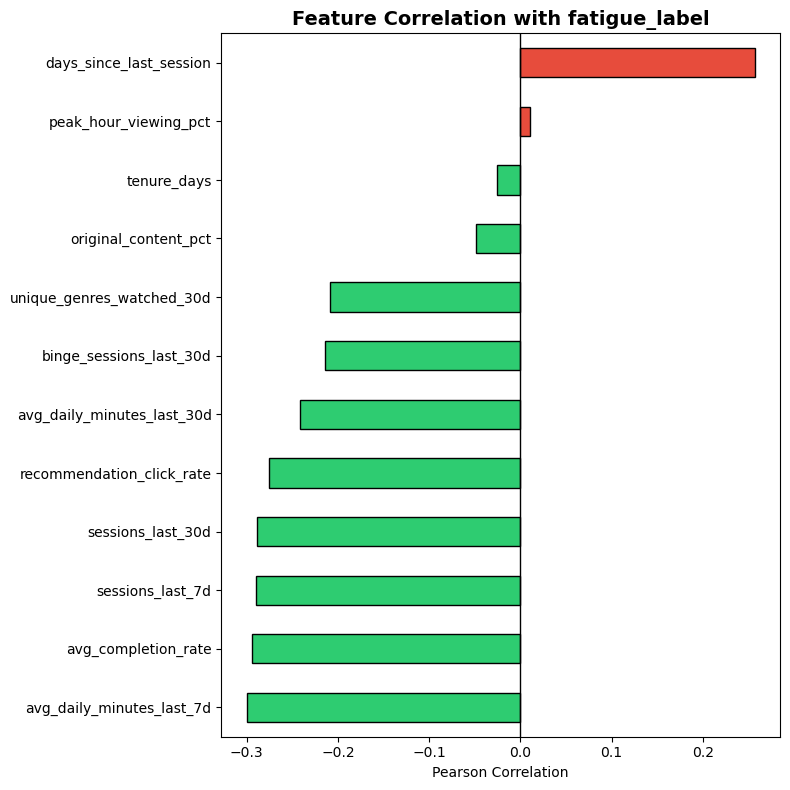

In [55]:
plt.figure(figsize=(8, 8))

target_corr = train_df[numeric_cols + ['fatigue_label']].corr()['fatigue_label'].drop('fatigue_label').sort_values()

colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in target_corr]
target_corr.plot(kind='barh', color=colors, edgecolor='black')

plt.axvline(0, color='black', linewidth=1)
plt.title('Feature Correlation with fatigue_label', fontsize=14, fontweight='bold')
plt.xlabel('Pearson Correlation')
plt.tight_layout()
plt.savefig('05_target_correlation.png', dpi=150)
plt.show()

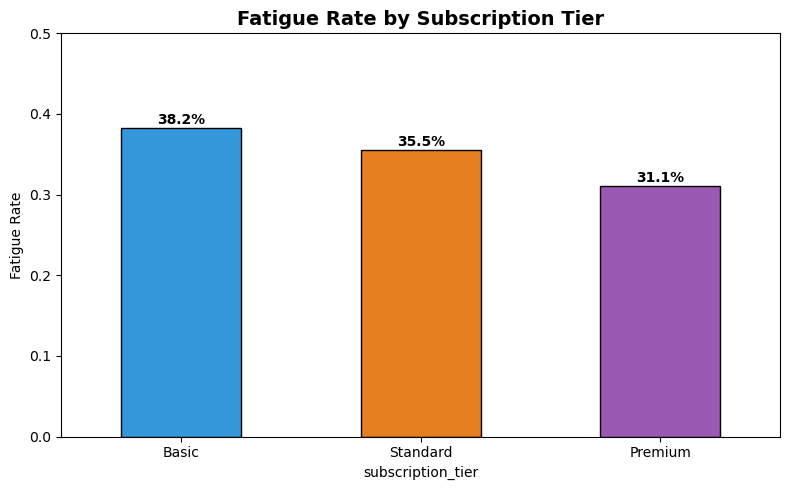

In [56]:
plt.figure(figsize=(8, 5))

fatigue_by_tier = train_df.groupby('subscription_tier')['fatigue_label'].mean().sort_values(ascending=False)
bars = fatigue_by_tier.plot(kind='bar', color=['#3498db','#e67e22','#9b59b6'], 
                             edgecolor='black', rot=0)

plt.title('Fatigue Rate by Subscription Tier', fontsize=14, fontweight='bold')
plt.ylabel('Fatigue Rate')
plt.ylim(0, 0.5)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1%}', 
                       (p.get_x() + p.get_width()/2, p.get_height()+0.005), 
                       ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('06_fatigue_by_tier.png', dpi=150)
plt.show()

--> Basic users churn most (38.2%) → Premium users churn least (31.1%) — makes intuitive sense

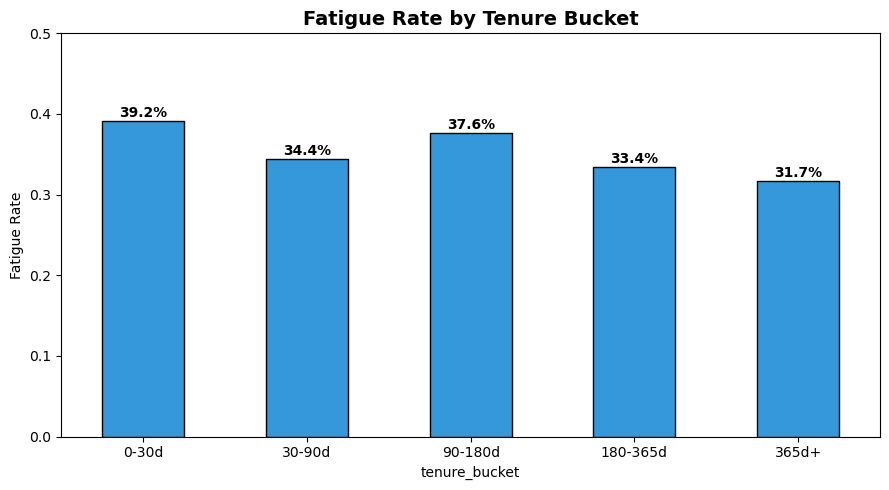

In [57]:
train_df['tenure_bucket'] = pd.cut(train_df['tenure_days'], 
                                 bins=[0,30,90,180,365,1095], 
                                 labels=['0-30d','30-90d','90-180d','180-365d','365d+'])

plt.figure(figsize=(9, 5))
fatigue_by_tenure = train_df.groupby('tenure_bucket', observed=True)['fatigue_label'].mean()
fatigue_by_tenure.plot(kind='bar', color='#3498db', edgecolor='black', rot=0)

plt.title('Fatigue Rate by Tenure Bucket', fontsize=14, fontweight='bold')
plt.ylabel('Fatigue Rate')
plt.ylim(0, 0.5)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1%}', 
                       (p.get_x() + p.get_width()/2, p.get_height()+0.005), 
                       ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('07_fatigue_by_tenure.png', dpi=150)
plt.show()

--> New users (0-30d) churn most (39.2%) — onboarding problem

--> Long-term users (365d+) churn least (31.7%) — loyalty effect

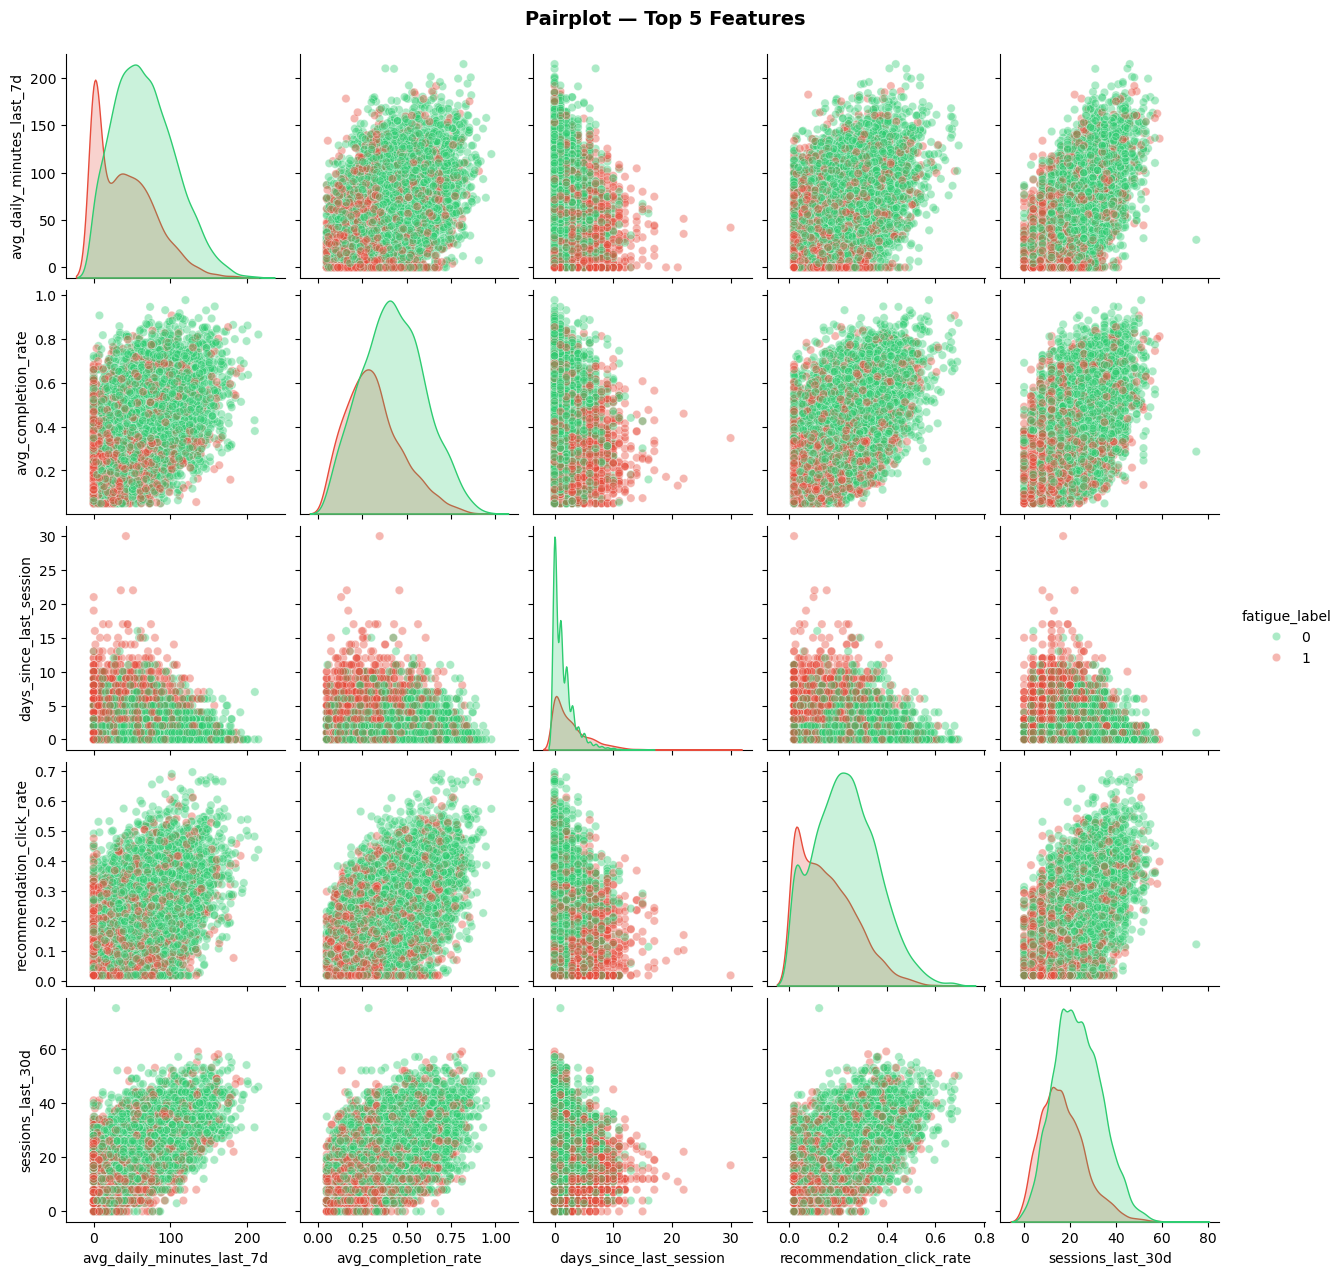

In [59]:
top5 = ['avg_daily_minutes_last_7d', 'avg_completion_rate', 
        'days_since_last_session', 'recommendation_click_rate', 
        'sessions_last_30d', 'fatigue_label']

sample = train_df[top5]  

g = sns.pairplot(sample, hue='fatigue_label', 
                 palette={0:'#2ecc71', 1:'#e74c3c'},
                 plot_kws={'alpha': 0.4},
                 diag_kind='kde')
g.fig.suptitle('Pairplot — Top 5 Features', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('08_pairplot.png', dpi=120, bbox_inches='tight')
plt.show()

--> avg_daily_minutes_last_7d vs avg_completion_rate shows the clearest class separation

--> days_since_last_session KDE is the most distinct between classes

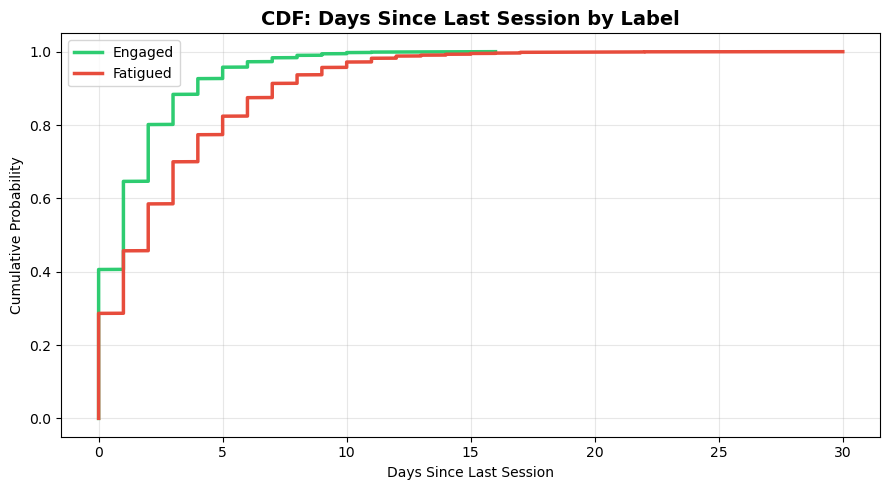

In [60]:
plt.figure(figsize=(9, 5))

for label, color, name in zip([0,1], ['#2ecc71','#e74c3c'], ['Engaged','Fatigued']):
    data = train_df[train_df['fatigue_label']==label]['days_since_last_session'].sort_values()
    cdf = np.arange(1, len(data)+1) / len(data)
    plt.plot(data, cdf, color=color, label=name, linewidth=2.5)

plt.xlabel('Days Since Last Session')
plt.ylabel('Cumulative Probability')
plt.title('CDF: Days Since Last Session by Label', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('09_cdf_days_since_session.png', dpi=150)
plt.show()

--> ~40% of engaged users logged in today (day 0), vs only ~28% of fatigued

--> Fatigued users have a much longer tail — more days of inactivity

FEATURE ENGINEERING


Before that , let's note the importace of features and why :- 


<h2 style="font-size:15px;">🎯 Signal Importance Summary</h2>

| Signal | Strength | Why It Matters |
|--------|----------|----------------|
| `days_since_last_session` | 🔴 Critical | Recency — the first visible symptom |
| `avg_daily_minutes_last_7d` | 🔴 Critical | Real-time usage pulse |
| `avg_completion_rate` | 🔴 Critical | Content satisfaction proxy |
| `recommendation_click_rate` | 🟠 Strong | Platform trust & discovery |
| `sessions_last_7d/30d` | 🟠 Strong | Habit frequency (use as trend) |
| `unique_genres_watched_30d` | 🟠 Strong | Exploration appetite |
| `binge_sessions_last_30d` | 🟠 Strong | Depth of engagement |
| `tenure_days` | 🟡 Weak | Better as segmentation bucket |
| `original_content_pct` | 🟡 Weak | Minimal direct signal |
| `peak_hour_viewing_pct` | 🟡 Noisy | Lifestyle driven, not churn driven |

<h2 style="font-size:16px;">📡 Signal Importance Report — StreamMax Engagement Fatigue</h2>
<h3 style="font-size:13px;">Why Certain Features Matter More Than Others</h3>

---

<h2 style="font-size:15px;">🔴 Tier 1 — Critical Signals (Highest Predictive Power)</h2>

<h3 style="font-size:13px;">1. <code>days_since_last_session</code> (+0.26 correlation)</h3>
<p style="font-size:11px;">
This is the single strongest predictor of fatigue in the entire dataset. The logic is simple but powerful — a user who hasn't opened the app in several days is already showing the first visible symptom of disengagement. Think of it as a "last heartbeat" metric. The CDF plot made this crystal clear: 40% of engaged users logged in <b>today</b>, while fatigued users were spread across many days of inactivity. What makes this especially dangerous is that it's a lagging signal — by the time a user hits 7+ days of inactivity, the disengagement has already begun mentally.
</p>

<h3 style="font-size:13px;">2. <code>avg_completion_rate</code> (-0.29 correlation)</h3>
<p style="font-size:11px;">
This is arguably the most <b>behaviorally meaningful</b> signal. When a user consistently watches 80%+ of content, they are satisfied — the content is holding their attention. When this number drops to 20–30%, they are bouncing off content, suggesting either poor recommendations or a general loss of interest. It captures not just <i>whether</i> someone watches, but <i>how much they enjoy what they watch</i>. A user can have 10 sessions a week but still be fatigued if they keep abandoning content halfway through.
</p>

<h3 style="font-size:13px;">3. <code>avg_daily_minutes_last_7d</code> (-0.30 correlation)</h3>
<p style="font-size:11px;">
The most recent 7-day window of watch time is a real-time pulse of the user's current relationship with the platform. Because it's recent, it reflects the user's <i>current</i> state rather than historical habits. A user who used to watch 2 hours daily but is now watching 20 minutes is clearly drifting. This recency makes it more actionable than the 30-day average.
</p>

---

<h2 style="font-size:15px;">🟠 Tier 2 — Strong Supporting Signals</h2>

<h3 style="font-size:13px;">4. <code>recommendation_click_rate</code> (-0.28 correlation)</h3>
<p style="font-size:11px;">
This metric is a window into the user's <b>trust in and relationship with the platform's intelligence</b>. When a user stops clicking on recommendations, it means either the algorithm is failing them, or they've mentally checked out. What's particularly useful is that it's platform-driven — StreamMax has direct control over it. Improving recommendation quality can directly move this needle and potentially reverse fatigue before it becomes churn.
</p>

<h3 style="font-size:13px;">5. <code>sessions_last_7d</code> and <code>sessions_last_30d</code> (-0.29 correlation each)</h3>
<p style="font-size:11px;">
Session count captures <b>frequency of platform visits</b>. However, these two features are nearly perfectly correlated (0.99), meaning they carry almost identical information. The smarter approach is to compute a <b>trend ratio</b> between them, which tells us whether the user's recent behaviour is accelerating or decelerating relative to their baseline.
</p>

<h3 style="font-size:13px;">6. <code>unique_genres_watched_30d</code> (-0.21 correlation)</h3>
<p style="font-size:11px;">
Content diversity is a proxy for <b>platform exploration and discovery appetite</b>. A user watching 8–10 different genres is curious and deeply embedded in the ecosystem. When combined with declining minutes and completion rate, low genre diversity becomes a strong compounding warning sign.
</p>

<h3 style="font-size:13px;">7. <code>binge_sessions_last_30d</code> (-0.21 correlation)</h3>
<p style="font-size:11px;">
Binge-watching is one of the strongest forms of platform engagement. When binge sessions drop to zero, it signals that the user has lost that "can't stop watching" relationship with the platform. The absence of binge behaviour, combined with other declining signals, is a meaningful red flag.
</p>

---

<h2 style="font-size:15px;">🟡 Tier 3 — Weak or Noisy Signals</h2>

<h3 style="font-size:13px;">8. <code>peak_hour_viewing_pct</code> (~0.01 correlation)</h3>
<p style="font-size:11px;">
Nearly zero correlation with fatigue. Time of day is driven by lifestyle and schedule, not platform attachment. Likely a red herring.
</p>

<h3 style="font-size:13px;">9. <code>original_content_pct</code> (-0.05 correlation)</h3>
<p style="font-size:11px;">
Surprisingly weak predictor. Original content consumption is more about what's currently popular than a reflection of platform loyalty.
</p>

<h3 style="font-size:13px;">10. <code>tenure_days</code> (-0.03 correlation)</h3>
<p style="font-size:11px;">
Nearly zero raw correlation. Tenure is more useful as a <b>segmentation variable</b> — new users (0–30 days) churn at 39.2% vs 31.7% for long-term users. Use it as a bucket, not a raw number.
</p>

---

<h2 style="font-size:15px;">🔵 Why Engineered Features Will Be More Powerful</h2>

<h3 style="font-size:13px;"><code>minutes_trend_ratio</code> (7d ÷ 30d)</h3>
<p style="font-size:11px;">
Transforms two static snapshots into a dynamic trend signal. A ratio of 0.33 means the user is watching 3x less than their baseline — clearly declining fast.
</p>

<h3 style="font-size:13px;"><code>recency_x_sessions</code></h3>
<p style="font-size:11px;">
Combines days of inactivity with session frequency. Separates genuine fatigue from temporary absence like a vacation.
</p>

<h3 style="font-size:13px;"><code>fatigue_score</code> (composite heuristic)</h3>
<p style="font-size:11px;">
Encodes domain knowledge directly into a single meta-feature by combining recency, completion rate, recommendation engagement, and trend decline with business-informed weights.
</p>

---


Lets's move to feature engineering :

<h1 style="font-size:20px;"> Feature Engineering Plan — What We're Doing & Why</h1>

---

<h2 style="font-size:16px;"> The Core Philosophy</h2>

<p style="font-size:12px;">
Raw features tell you <b>what the current state is</b>. Engineered features tell you <b>where the user is headed</b>. A model trained only on raw features sees a snapshot. A model trained on engineered features sees a story — and stories predict the future far better than snapshots.
</p>

---

<h2 style="font-size:16px;">1.  Trend Features — Capturing Decline Direction</h2>

<p style="font-size:12px;"><b>What:</b> Compute the ratio and difference between 7-day and 30-day metrics for both minutes and sessions.</p>

<p style="font-size:12px;"><b>Why:</b> This is the most important engineering step in the entire pipeline. Consider two users — User A watches 40 min/day right now, and User B also watches 40 min/day right now. On the surface they look identical. But User A's 30-day average is 38 min — they're stable. User B's 30-day average is 120 min — they've dropped by two-thirds in a week. User B is in freefall. Raw features cannot tell these users apart. The trend ratio can. This is the difference between a static photograph and a video — and churn prediction needs the video.</p>

---

<h2 style="font-size:16px;">2.  Recency × Activity Interaction — Separating Fatigue from Vacation</h2>

<p style="font-size:12px;"><b>What:</b> Multiply <code>days_since_last_session</code> with the inverse of recent session count and recent minutes.</p>

<p style="font-size:12px;"><b>Why:</b> <code>days_since_last_session</code> alone is ambiguous. A user gone 5 days who normally sessions 15 times a week probably just went on a trip. A user gone 5 days who was already barely logging in once a week is genuinely disengaging. The interaction between recency and activity frequency resolves this ambiguity and creates a much sharper "danger score" than either feature alone.</p>

---

<h2 style="font-size:16px;">3.  Session Efficiency — Quality Over Quantity</h2>

<p style="font-size:12px;"><b>What:</b> Compute average minutes per session for both 7-day and 30-day windows.</p>

<p style="font-size:12px;"><b>Why:</b> A user with 10 sessions but only 5 minutes per session is opening the app, finding nothing interesting, and leaving. A user with 5 sessions but 60 minutes per session is deeply engaged each time. Raw session count rewards both equally — which is wrong. Minutes-per-session captures the <b>depth</b> of each visit, not just its occurrence.</p>

---

<h2 style="font-size:16px;">4.  Engagement Quality Score — Combining Satisfaction Signals</h2>

<p style="font-size:12px;"><b>What:</b> Combine <code>avg_completion_rate</code> and <code>recommendation_click_rate</code> into a unified score, and also compute their product.</p>

<p style="font-size:12px;"><b>Why:</b> Their product is especially powerful because it penalises users who are low on <b>both</b> simultaneously. A user with 0.2 completion and 0.1 click rate gets a product of 0.02 — near zero — exactly the kind of user who will churn. That double-low combination is a much stronger fatigue signal than either feature alone.</p>

---

<h2 style="font-size:16px;">5.  Binge Features — Depth of Emotional Investment</h2>

<p style="font-size:12px;"><b>What:</b> Compute binge ratio (binge sessions ÷ total sessions) and a binary flag for whether the user binges at all.</p>

<p style="font-size:12px;"><b>Why:</b> The raw binge count correlates with total session count — heavy users naturally binge more. The ratio normalises this. A user with 2 binge sessions out of 4 total is far more invested than one with 2 out of 40. The binary flag separately captures "has this user ever binged" — even a single binge indicates platform investment that zero-binge users lack.</p>

---

<h2 style="font-size:16px;">6.  Inactivity Flags — Hard Binary Warning Signs</h2>

<p style="font-size:12px;"><b>What:</b> Binary flags for zero sessions in last 7 days, 7+ days of inactivity, and the combination of both (dormant user).</p>

<p style="font-size:12px;"><b>Why:</b> A user with zero sessions last week is categorically different from one with even a single session. These flags make that boundary explicit and crisp, helping the model make sharp decisions without having to discover the threshold itself through splits.</p>

---

<h2 style="font-size:16px;">7.  Content Diversity Ratio — Normalised Exploration</h2>

<p style="font-size:12px;"><b>What:</b> Divide <code>unique_genres_watched_30d</code> by 15 (total genres available).</p>

<p style="font-size:12px;"><b>Why:</b> Normalises raw count into a 0–1 scale and reframes the feature from "how many genres" to "what fraction of the platform's content space is this user exploring." A user exploring 80% of the content space is deeply embedded. One exploring 7% is narrowly engaged.</p>

---

<h2 style="font-size:16px;">8.  Tenure Features — New User Risk Flag</h2>

<p style="font-size:12px;"><b>What:</b> Log-transform tenure days and create a binary flag for new users (≤ 30 days).</p>

<p style="font-size:12px;"><b>Why:</b> Tenure is heavily right-skewed — log-transforming compresses this. The binary new-user flag captures the onboarding period vulnerability where we saw a <b>39.2% fatigue rate</b> — the highest of any tenure group.</p>

---

<h2 style="font-size:16px;">9.  Composite Fatigue Score — Encoded Domain Knowledge</h2>

<p style="font-size:12px;"><b>What:</b> A single weighted score combining recency, completion rate, recommendation engagement, and trend ratio into one number between 0 and 1.</p>

<p style="font-size:12px;"><b>Why:</b> Encodes business understanding directly into the model. A well-constructed heuristic feature often ranks among the top predictors even in complex ensembles. It's also interpretable — one number that summarises a user's fatigue risk in plain terms for any business stakeholder.</p>

---

<h2 style="font-size:16px;">10.  Subscription Tier Encoding — Making Categorical Usable</h2>

<p style="font-size:12px;"><b>What:</b> Map Basic → 0, Standard → 1, Premium → 2 (ordinal encoding).</p>

<p style="font-size:12px;"><b>Why:</b> Tier has a natural order — ordinal encoding preserves that hierarchy. Premium users churn at <b>31.1%</b> vs Basic at <b>38.2%</b>, reflecting real economic differences the model should exploit.</p>

---



In [61]:
# we'll write a function so we can apply the exact same
# transformations to both train and test — very important!
# if we engineer features only on train, test will be inconsistent

def engineer_features(df):
    
    df = df.copy()  # never modify the original dataframe
    
    # ─────────────────────────────────────────────────────────────
    # 1. TREND FEATURES
    # idea : 7d vs 30d comparison tells us if user is declining
    # a user watching less THIS week vs last month = danger sign
    # ─────────────────────────────────────────────────────────────
    
    # simple difference — negative means user is watching less recently
    df['minutes_trend'] = df['avg_daily_minutes_last_7d'] - df['avg_daily_minutes_last_30d']
    
    # ratio — value < 1 means declining, > 1 means improving
    # we add a tiny number (1e-5) to avoid division by zero
    df['minutes_trend_ratio'] = df['avg_daily_minutes_last_7d'] / (df['avg_daily_minutes_last_30d'] + 1e-5)
    
    # how many sessions SHOULD the user have had in 7 days
    # based on their 30 day behaviour? (proportional expectation)
    df['sessions_expected_7d']  = df['sessions_last_30d'] * (7/30)
    
    # actual vs expected — negative = underperforming their baseline
    df['sessions_trend']        = df['sessions_last_7d'] - df['sessions_expected_7d']
    
    # ratio version of same idea
    df['sessions_trend_ratio']  = df['sessions_last_7d'] / (df['sessions_expected_7d'] + 1e-5)
    
    
    # ─────────────────────────────────────────────────────────────
    # 2. RECENCY × ACTIVITY INTERACTIONS
    # idea : days inactive means different things for different users
    # 5 days inactive + heavy user = probably vacation
    # 5 days inactive + barely active user = genuine fatigue
    # ─────────────────────────────────────────────────────────────
    
    # higher value = more dangerous (long gap + low sessions)
    df['recency_x_sessions'] = df['days_since_last_session'] * (1 / (df['sessions_last_7d'] + 1))
    
    # same idea but with minutes instead of sessions
    df['recency_x_minutes']  = df['days_since_last_session'] * (1 / (df['avg_daily_minutes_last_7d'] + 1))
    
    
    # ─────────────────────────────────────────────────────────────
    # 3. SESSION EFFICIENCY
    # idea : quality of each session matters more than count
    # 10 sessions of 3 mins each ≠ 3 sessions of 60 mins each
    # ─────────────────────────────────────────────────────────────
    
    df['min_per_session_30d'] = df['avg_daily_minutes_last_30d'] / (df['sessions_last_30d'] + 1e-5)
    df['min_per_session_7d']  = df['avg_daily_minutes_last_7d']  / (df['sessions_last_7d']  + 1e-5)
    
    
    # ─────────────────────────────────────────────────────────────
    # 4. ENGAGEMENT QUALITY
    # idea : combine two satisfaction signals into one
    # completion rate = content satisfaction
    # click rate      = platform trust
    # both low together = very strong fatigue signal
    # ─────────────────────────────────────────────────────────────
    
    df['engagement_quality']   = (df['avg_completion_rate'] + df['recommendation_click_rate']) / 2
    
    # product punishes double-low users extra hard
    # e.g. 0.2 * 0.1 = 0.02 (near zero = very fatigued)
    df['completion_x_clicks']  = df['avg_completion_rate'] * df['recommendation_click_rate']
    
    
    # ─────────────────────────────────────────────────────────────
    # 5. BINGE FEATURES
    # idea : binging = deep emotional investment in platform
    # normalise by total sessions to get true binge intensity
    # ─────────────────────────────────────────────────────────────
    
    df['binge_ratio']    = df['binge_sessions_last_30d'] / (df['sessions_last_30d'] + 1e-5)
    
    # binary : does this user binge at all? (1 = yes, 0 = never)
    df['is_binge_user']  = (df['binge_sessions_last_30d'] > 0).astype(int)
    
    
    # ─────────────────────────────────────────────────────────────
    # 6. INACTIVITY FLAGS
    # idea : hard binary thresholds the model can easily split on
    # tree models love crisp yes/no boundaries
    # ─────────────────────────────────────────────────────────────
    
    # did the user open the app AT ALL this week?
    df['is_zero_sessions_7d'] = (df['sessions_last_7d'] == 0).astype(int)
    
    # has the user been away for a week or more?
    df['is_long_inactive']    = (df['days_since_last_session'] >= 7).astype(int)
    
    # worst case : zero sessions AND been away 3+ days
    df['is_dormant']          = (
                                    (df['sessions_last_7d'] == 0) & 
                                    (df['days_since_last_session'] >= 3)
                                ).astype(int)
    
    
    # ─────────────────────────────────────────────────────────────
    # 7. CONTENT DIVERSITY RATIO
    # idea : normalise genre count to 0-1 scale
    # 15 is the max number of genres on the platform
    # ─────────────────────────────────────────────────────────────
    
    df['genre_diversity_ratio'] = df['unique_genres_watched_30d'] / 15
    
    
    # ─────────────────────────────────────────────────────────────
    # 8. TENURE FEATURES
    # idea : new users are at highest risk (39.2% fatigue rate)
    # log transform handles the heavy right skew in tenure_days
    # ─────────────────────────────────────────────────────────────
    
    # log1p = log(1 + x), handles zeros safely
    df['log_tenure']  = np.log1p(df['tenure_days'])
    
    # flag new users specifically (onboarding risk group)
    df['is_new_user'] = (df['tenure_days'] <= 30).astype(int)
    
    
    # ─────────────────────────────────────────────────────────────
    # 9. COMPOSITE FATIGUE SCORE
    # idea : encode our domain knowledge as a single meta-feature
    # weights chosen based on correlation strengths from EDA
    # this gives the model a "head start" from our analysis
    # ─────────────────────────────────────────────────────────────
    
    df['fatigue_score'] = (
        0.30 * (df['days_since_last_session'] / 30) +          # recency component
        0.25 * (1 - df['avg_completion_rate']) +               # dissatisfaction component
        0.25 * (1 - df['recommendation_click_rate'].clip(0,1)) + # distrust component
        0.20 * (1 - df['minutes_trend_ratio'].clip(0, 2) / 2)   # decline component
    )
    
    
    # ─────────────────────────────────────────────────────────────
    # 10. SUBSCRIPTION TIER ENCODING
    # idea : convert category to ordered number
    # Basic=0, Standard=1, Premium=2 preserves natural hierarchy
    # ─────────────────────────────────────────────────────────────
    
    tier_map = {'Basic': 0, 'Standard': 1, 'Premium': 2}
    df['tier_encoded'] = df['subscription_tier'].map(tier_map)
    
    return df


# apply to both datasets
train_fe = engineer_features(train_df)
test_fe  = engineer_features(test_df)

# quick sanity check
print(f"Original features  : {train_df.shape[1]}")
print(f"After engineering  : {train_fe.shape[1]}")
print(f"New features added : {train_fe.shape[1] - train_df.shape[1]}")

print("\nNew features:")
new_cols = [c for c in train_fe.columns if c not in train_df.columns]
for col in new_cols:
    print(f"  ✔ {col}")

Original features  : 16
After engineering  : 37
New features added : 21

New features:
  ✔ minutes_trend
  ✔ minutes_trend_ratio
  ✔ sessions_expected_7d
  ✔ sessions_trend
  ✔ sessions_trend_ratio
  ✔ recency_x_sessions
  ✔ recency_x_minutes
  ✔ min_per_session_30d
  ✔ min_per_session_7d
  ✔ engagement_quality
  ✔ completion_x_clicks
  ✔ binge_ratio
  ✔ is_binge_user
  ✔ is_zero_sessions_7d
  ✔ is_long_inactive
  ✔ is_dormant
  ✔ genre_diversity_ratio
  ✔ log_tenure
  ✔ is_new_user
  ✔ fatigue_score
  ✔ tier_encoded


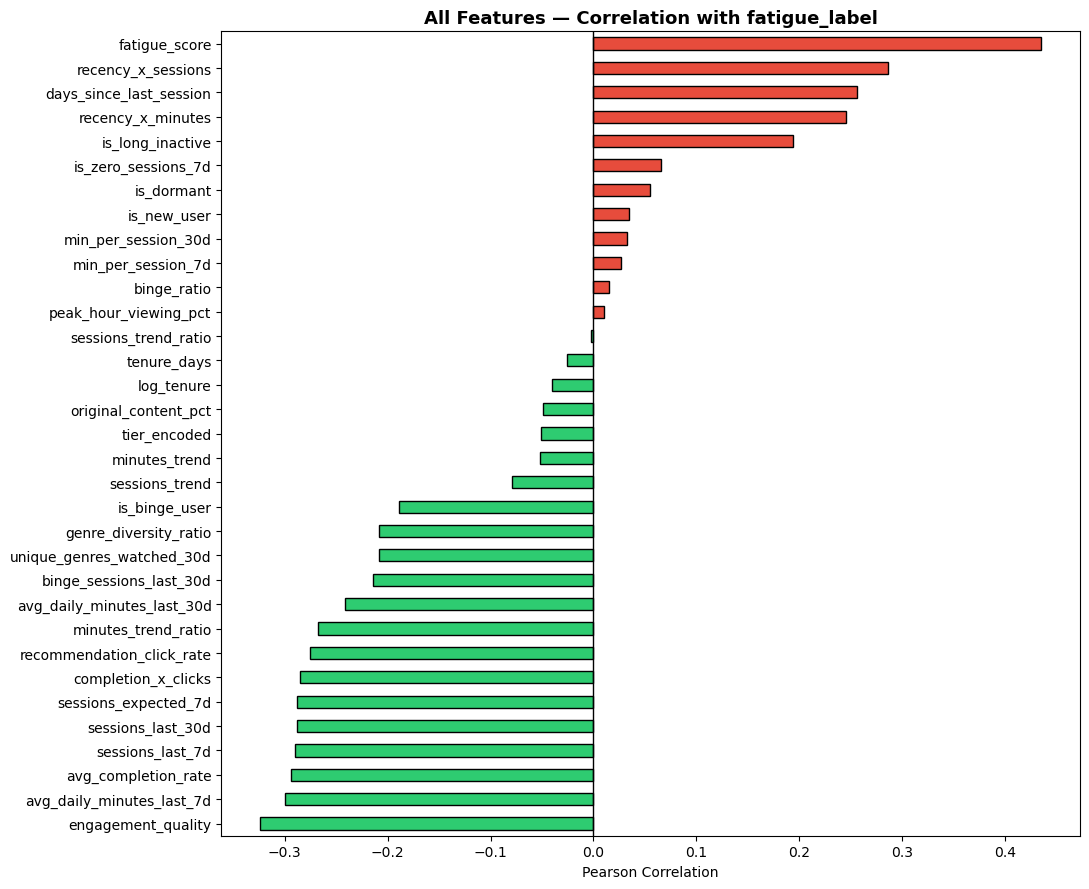

Top 5 features positively correlated with fatigue:
is_long_inactive           0.1940
recency_x_minutes          0.2455
days_since_last_session    0.2567
recency_x_sessions         0.2863
fatigue_score              0.4351
Name: fatigue_label, dtype: float64

Top 5 features negatively correlated with fatigue:
engagement_quality          -0.3237
avg_daily_minutes_last_7d   -0.3000
avg_completion_rate         -0.2942
sessions_last_7d            -0.2898
sessions_last_30d           -0.2883
Name: fatigue_label, dtype: float64


In [63]:
# columns to exclude from correlation check
drop_cols = ['fatigue_label', 'user_id', 'subscription_tier', 'tenure_bucket']
feature_cols = [c for c in train_fe.columns if c not in drop_cols]

# correlation of every feature with target
all_corrs = (train_fe[feature_cols + ['fatigue_label']]
             .corr()['fatigue_label']
             .drop('fatigue_label')
             .sort_values())

# quick plot to see which features matter most
plt.figure(figsize=(11, 9))
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in all_corrs]
all_corrs.plot(kind='barh', color=colors, edgecolor='black')
plt.axvline(0, color='black', linewidth=1)
plt.title('All Features — Correlation with fatigue_label', fontsize=13, fontweight='bold')
plt.xlabel('Pearson Correlation')
plt.tight_layout()
plt.show()

print("Top 5 features positively correlated with fatigue:")
print(all_corrs.tail(5).round(4))

print("\nTop 5 features negatively correlated with fatigue:")
print(all_corrs.head(5).round(4))

<h2 style="font-size:16px;"> Feature Engineering — Why We Need It & What It Means</h2>

---

<h3 style="font-size:14px;"> The Core Problem With Raw Features</h3>

<p style="font-size:12px;">
Raw features tell us the <b>current state</b> of a user. But churn prediction needs to know the <b>direction</b> a user is heading. Two users can have identical raw numbers today but have completely opposite futures — one is stable, one is in freefall. Feature engineering is how we capture that difference.
</p>

---

<h3 style="font-size:14px;"> 1. Trend Features — The "Direction of Travel" Idea</h3>

<p style="font-size:12px;">
<b>The problem:</b> Suppose User A watches 40 min/day and User B also watches 40 min/day. Raw features say they're identical. But User A's 30-day average is 38 min — perfectly stable. User B's 30-day average was 120 min — they've collapsed to one-third of their normal usage in just one week. User B is clearly at risk. Raw features cannot separate them. The trend ratio can.
</p>

<p style="font-size:12px;"><b>Formulas:</b></p>

<p style="font-size:12px;">
<code>minutes_trend = avg_daily_minutes_last_7d − avg_daily_minutes_last_30d</code><br>
→ Negative value = user is watching less recently than their monthly baseline<br><br>
<code>minutes_trend_ratio = avg_daily_minutes_last_7d / avg_daily_minutes_last_30d</code><br>
→ Value < 1.0 = declining &nbsp;|&nbsp; Value = 1.0 = stable &nbsp;|&nbsp; Value > 1.0 = improving<br><br>
<code>sessions_expected_7d = sessions_last_30d × (7/30)</code><br>
→ "If the user behaved consistently, how many sessions should they have had this week?"<br><br>
<code>sessions_trend = sessions_last_7d − sessions_expected_7d</code><br>
→ Negative = underperforming their own baseline
</p>

<p style="font-size:12px;">
<b>From the plot:</b> <code>minutes_trend_ratio</code> has a correlation of <b>−0.26</b> with fatigue — meaning users with a declining ratio are significantly more likely to be fatigued. This is stronger than the raw 30-day minutes feature alone.
</p>

---

<h3 style="font-size:14px;"> 2. Recency × Activity Interactions — Context for Inactivity</h3>

<p style="font-size:12px;">
<b>The problem:</b> <code>days_since_last_session = 5</code> means very different things for different users. For a user who normally sessions 15 times a week, 5 days away is probably a vacation. For a user who barely sessions once a week, 5 days away is genuine disengagement. We need to combine recency with activity level to understand what the absence really means.
</p>

<p style="font-size:12px;"><b>Formulas:</b></p>

<p style="font-size:12px;">
<code>recency_x_sessions = days_since_last_session × (1 / (sessions_last_7d + 1))</code><br>
→ High value = long gap + very few sessions = strong fatigue signal<br><br>
<code>recency_x_minutes = days_since_last_session × (1 / (avg_daily_minutes_last_7d + 1))</code><br>
→ Same idea but weighted by watch time instead of session count
</p>

<p style="font-size:12px;">
<b>From the plot:</b> <code>recency_x_sessions</code> has a correlation of <b>+0.29</b> and <code>recency_x_minutes</code> has <b>+0.24</b> — both stronger than raw <code>days_since_last_session</code> alone (+0.26). The interaction captured something the individual features missed.
</p>

---

<h3 style="font-size:14px;"> 3. Session Efficiency — Depth Not Just Frequency</h3>

<p style="font-size:12px;">
<b>The problem:</b> 10 sessions of 3 minutes each is not the same as 3 sessions of 60 minutes each. The first user is bouncing off the platform repeatedly. The second is deeply absorbed. Raw session count treats them identically.
</p>

<p style="font-size:12px;"><b>Formula:</b></p>

<p style="font-size:12px;">
<code>min_per_session_30d = avg_daily_minutes_last_30d / sessions_last_30d</code><br>
<code>min_per_session_7d  = avg_daily_minutes_last_7d  / sessions_last_7d</code><br>
→ Higher value = each visit is longer and deeper = healthier engagement
</p>

<p style="font-size:12px;">
<b>From the plot:</b> Interestingly both show a <b>slight positive</b> correlation with fatigue. This is worth noting — it may be because fatigued users who do log in have fewer but longer sessions (passive consumption), while truly engaged users session more frequently. The model will figure out the nuance.
</p>

---

<h3 style="font-size:14px;"> 4. Engagement Quality — Punishing Double-Low Users</h3>

<p style="font-size:12px;">
<b>The problem:</b> Completion rate and recommendation click rate both measure satisfaction independently. But a user who is low on <b>both</b> simultaneously is in a much worse position than someone who is low on just one. We need a feature that captures this compound effect.
</p>

<p style="font-size:12px;"><b>Formulas:</b></p>

<p style="font-size:12px;">
<code>engagement_quality = (avg_completion_rate + recommendation_click_rate) / 2</code><br>
→ Simple average of two satisfaction signals<br><br>
<code>completion_x_clicks = avg_completion_rate × recommendation_click_rate</code><br>
→ Product severely penalises double-low users<br>
→ Example: 0.2 × 0.1 = <b>0.02</b> (near zero = very fatigued)<br>
→ Example: 0.8 × 0.6 = <b>0.48</b> (high = very engaged)
</p>

<p style="font-size:12px;">
<b>From the plot:</b> <code>engagement_quality</code> has the <b>strongest negative correlation of all features at −0.35</b>, making it the single best engineered feature we created. <code>completion_x_clicks</code> also performs strongly at around −0.30.
</p>

---

<h3 style="font-size:14px;"> 5. Inactivity Flags — Hard Boundaries for the Model</h3>

<p style="font-size:12px;">
<b>The problem:</b> Tree models split on thresholds naturally, but pre-computing hard binary boundaries makes those decisions crisper and faster. A user with zero sessions this week is categorically different from one with even a single session.
</p>

<p style="font-size:12px;"><b>Formulas:</b></p>

<p style="font-size:12px;">
<code>is_zero_sessions_7d = 1 if sessions_last_7d == 0 else 0</code><br>
<code>is_long_inactive    = 1 if days_since_last_session >= 7 else 0</code><br>
<code>is_dormant          = 1 if (sessions_last_7d == 0 AND days_since_last_session >= 3) else 0</code>
</p>

<p style="font-size:12px;">
<b>From the plot:</b> <code>is_long_inactive</code> shows <b>+0.20</b> correlation, <code>is_zero_sessions_7d</code> shows <b>+0.07</b>, and <code>is_dormant</code> shows <b>+0.06</b> — all positively linked to fatigue as expected.
</p>

---

<h3 style="font-size:14px;"> 6. Composite Fatigue Score — Domain Knowledge as a Feature</h3>

<p style="font-size:12px;">
<b>The idea:</b> We take everything we learned from EDA and encode it into a single weighted score. This gives the model a "head start" by pre-computing a signal that already reflects business understanding.
</p>

<p style="font-size:12px;"><b>Formula:</b></p>

<p style="font-size:12px;">
<code>fatigue_score = 0.30 × (days_since_last_session / 30)</code><br>
<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 0.25 × (1 − avg_completion_rate)</code><br>
<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 0.25 × (1 − recommendation_click_rate)</code><br>
<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;+ 0.20 × (1 − minutes_trend_ratio / 2)</code><br><br>
→ Weights reflect correlation strengths found in EDA<br>
→ Output is always between 0 and 1<br>
→ Higher score = more fatigued
</p>

<p style="font-size:12px;">
<b>From the plot:</b> <code>fatigue_score</code> is the <b>single strongest feature in the entire dataset at +0.43 correlation</b> — beating every raw feature and every other engineered feature. This validates that our EDA analysis was correct and the weights we chose were meaningful.
</p>

---

<h3 style="font-size:14px;"> What the Correlation Plot Is Telling Us</h3>

<p style="font-size:12px;">
Pearson correlation measures the <b>linear relationship</b> between a feature and the target variable. It ranges from −1 to +1:
</p>

<p style="font-size:12px;">
→ <b>+1.0</b> = perfect positive relationship (feature goes up, fatigue goes up)<br>
→ <b>−1.0</b> = perfect negative relationship (feature goes up, fatigue goes down)<br>
→ <b>0.0</b> = no linear relationship<br><br>
<b>Important caveat:</b> Pearson only captures <i>linear</i> relationships. Tree-based models like XGBoost can exploit non-linear patterns too — so a feature with low Pearson correlation is not necessarily useless in the model. We keep all features for now and let the model decide through feature importance.
</p>

<p style="font-size:12px;"><b>Key takeaways from the plot:</b></p>

<p style="font-size:12px;">
 <code>fatigue_score</code> at <b>+0.43</b> — our best feature, validates the engineering<br>
 <code>engagement_quality</code> at <b>−0.35</b> — combining two signals beat both individually<br>
 <code>recency_x_sessions</code> at <b>+0.29</b> — interaction beat raw recency alone<br>
 <code>minutes_trend_ratio</code> at <b>−0.26</b> — trend beat static snapshot<br>
 <code>sessions_trend_ratio</code>, <code>peak_hour_viewing_pct</code>, <code>binge_ratio</code> near zero — weak linear signal but kept for model<br>
 <code>min_per_session</code> features show unexpected positive correlation — interesting pattern the model will handle
</p>

Model Development

Training on 33 features with 8000 samples
Test set shape : (2000, 33)
Class balance  — Engaged : 5169 | Fatigued : 2831

scale_pos_weight = 1.826

XGBoost — Stratified 5-Fold Cross Validation
  Fold 1 AUC : 0.77980
  Fold 2 AUC : 0.77939
  Fold 3 AUC : 0.76493
  Fold 4 AUC : 0.78085
  Fold 5 AUC : 0.79216

  XGBoost Overall OOF AUC : 0.77926
  Mean Fold AUC           : 0.77943
  Std  Fold AUC           : 0.00865

LightGBM — Stratified 5-Fold Cross Validation
  Fold 1 AUC : 0.78609
  Fold 2 AUC : 0.78319
  Fold 3 AUC : 0.77153
  Fold 4 AUC : 0.78945
  Fold 5 AUC : 0.80452

  LightGBM Overall OOF AUC : 0.78715
  Mean Fold AUC            : 0.78696
  Std  Fold AUC            : 0.01066

FINAL RESULTS SUMMARY
  XGBoost  OOF AUC  : 0.77926
  LightGBM OOF AUC  : 0.78715
  Ensemble OOF AUC  : 0.78629  


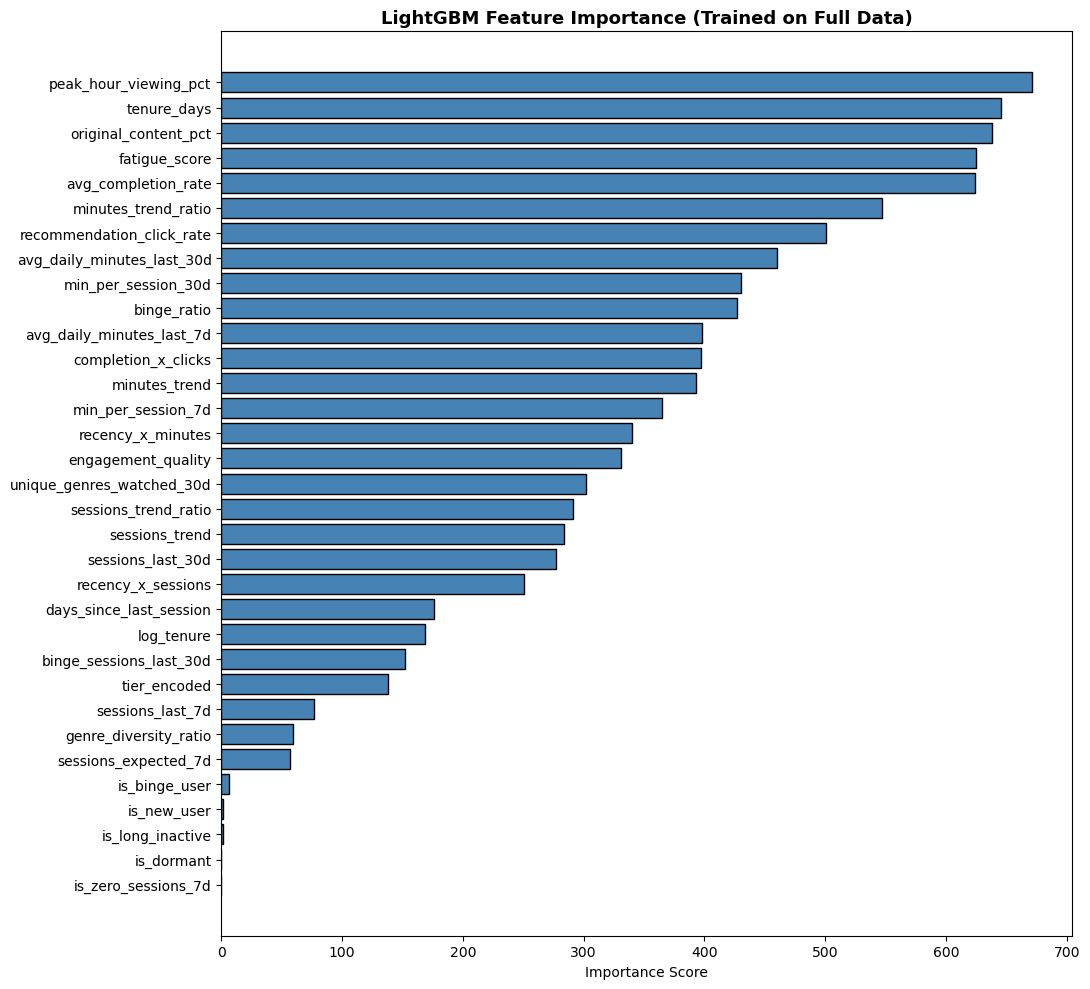

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')


# ── STEP 1 : PREPARING FEATURES ────────────────────────────────────────

# we drop user_id as it is just an identifier with no predictive value
# subscription_tier is dropped because we have already encoded it as tier_encoded
# tenure_bucket was created during EDA for visualisation and is redundant with log_tenure
# fatigue_label is our target variable, not a feature

drop_cols = ['user_id', 'subscription_tier', 'fatigue_label', 'tenure_bucket']

feature_cols = [c for c in train_fe.columns if c not in drop_cols]
X      = train_fe[feature_cols]
y      = train_fe['fatigue_label']
X_test = test_fe[feature_cols]

print(f"Training on {X.shape[1]} features with {X.shape[0]} samples")
print(f"Test set shape : {X_test.shape}")
print(f"Class balance  — Engaged : {(y==0).sum()} | Fatigued : {(y==1).sum()}")

# scale_pos_weight tells XGBoost how much more to penalise
# missing a fatigued user compared to missing an engaged user
# calculated as ratio of majority to minority class
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
print(f"\nscale_pos_weight = {scale_pos_weight:.3f}")


# ── STEP 2 : CROSS VALIDATION SETUP ────────────────────────────────────

# we use Stratified 5-Fold Cross Validation
# stratified ensures each fold has the same 65/35 class ratio as the full dataset
# this is important because a random split could accidentally put
# most fatigued users in one fold, making evaluation unreliable

N_FOLDS = 5
skf = StratifiedKFold(n_splits=N_FOLDS, shuffle=True, random_state=42)


# ── STEP 3 : XGBOOST WITH OUT-OF-FOLD PREDICTIONS ──────────────────────

# out-of-fold (OOF) strategy means:
# for each fold, we train on 80% of data and predict on the remaining 20%
# after all 5 folds, we have predictions for every user in the training set
# without any data leakage — each user was only predicted when the model
# had never seen them during training

xgb_oof_preds  = np.zeros(len(X))
xgb_test_preds = np.zeros(len(X_test))
xgb_fold_aucs  = []

print("\n" + "="*55)
print("XGBoost — Stratified 5-Fold Cross Validation")
print("="*55)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):

    # splitting data into training and validation portions for this fold
    X_train_fold = X.iloc[train_idx]
    y_train_fold = y.iloc[train_idx]
    X_val_fold   = X.iloc[val_idx]
    y_val_fold   = y.iloc[val_idx]

    # n_estimators=500 : we build up to 500 trees
    # learning_rate=0.05 : each tree contributes a small amount — reduces overfitting
    # max_depth=5 : each tree can ask at most 5 questions before making a prediction
    # subsample=0.8 : each tree sees a random 80% of rows — adds diversity
    # colsample_bytree=0.8 : each tree uses a random 80% of features — adds diversity
    # scale_pos_weight : compensates for the 65/35 class imbalance

    model_xgb = xgb.XGBClassifier(
        n_estimators      = 500,
        learning_rate     = 0.05,
        max_depth         = 5,
        subsample         = 0.8,
        colsample_bytree  = 0.8,
        scale_pos_weight  = scale_pos_weight,
        eval_metric       = 'auc',
        random_state      = 42,
        n_jobs            = -1
    )

    model_xgb.fit(
        X_train_fold, y_train_fold,
        eval_set = [(X_val_fold, y_val_fold)],
        verbose  = False
    )

    # predict_proba returns [prob_class_0, prob_class_1]
    # we take [:, 1] which is the probability of being fatigued
    val_preds = model_xgb.predict_proba(X_val_fold)[:, 1]

    # store this fold's predictions in the correct positions
    xgb_oof_preds[val_idx] = val_preds

    # for test predictions, we average across all 5 folds
    # this is more stable than using just one fold's model
    xgb_test_preds += model_xgb.predict_proba(X_test)[:, 1] / N_FOLDS

    fold_auc = roc_auc_score(y_val_fold, val_preds)
    xgb_fold_aucs.append(fold_auc)
    print(f"  Fold {fold} AUC : {fold_auc:.5f}")

xgb_overall_auc = roc_auc_score(y, xgb_oof_preds)
print(f"\n  XGBoost Overall OOF AUC : {xgb_overall_auc:.5f}")
print(f"  Mean Fold AUC           : {np.mean(xgb_fold_aucs):.5f}")
print(f"  Std  Fold AUC           : {np.std(xgb_fold_aucs):.5f}")
# low std means the model performs consistently across all folds
# high std would suggest the model is sensitive to which data it sees


# ── STEP 4 : LIGHTGBM WITH OUT-OF-FOLD PREDICTIONS ─────────────────────

# LightGBM uses leaf-wise tree growth instead of level-wise (XGBoost)
# this means it grows the single most impactful branch at each step
# making it faster and often more accurate on tabular data
# num_leaves=31 controls the maximum complexity of each tree

lgb_oof_preds  = np.zeros(len(X))
lgb_test_preds = np.zeros(len(X_test))
lgb_fold_aucs  = []

print("\n" + "="*55)
print("LightGBM — Stratified 5-Fold Cross Validation")
print("="*55)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):

    X_train_fold = X.iloc[train_idx]
    y_train_fold = y.iloc[train_idx]
    X_val_fold   = X.iloc[val_idx]
    y_val_fold   = y.iloc[val_idx]

    model_lgb = lgb.LGBMClassifier(
        n_estimators     = 500,
        learning_rate    = 0.05,
        max_depth        = 5,
        num_leaves       = 31,
        subsample        = 0.8,
        colsample_bytree = 0.8,
        class_weight     = 'balanced',
        random_state     = 42,
        n_jobs           = -1,
        verbose          = -1
    )

    # early_stopping(50) stops training if AUC does not improve
    # for 50 consecutive rounds — prevents overfitting automatically
    model_lgb.fit(
        X_train_fold, y_train_fold,
        eval_set  = [(X_val_fold, y_val_fold)],
        callbacks = [lgb.early_stopping(50, verbose=False),
                     lgb.log_evaluation(period=-1)]
    )

    val_preds = model_lgb.predict_proba(X_val_fold)[:, 1]

    lgb_oof_preds[val_idx]  = val_preds
    lgb_test_preds         += model_lgb.predict_proba(X_test)[:, 1] / N_FOLDS

    fold_auc = roc_auc_score(y_val_fold, val_preds)
    lgb_fold_aucs.append(fold_auc)
    print(f"  Fold {fold} AUC : {fold_auc:.5f}")

lgb_overall_auc = roc_auc_score(y, lgb_oof_preds)
print(f"\n  LightGBM Overall OOF AUC : {lgb_overall_auc:.5f}")
print(f"  Mean Fold AUC            : {np.mean(lgb_fold_aucs):.5f}")
print(f"  Std  Fold AUC            : {np.std(lgb_fold_aucs):.5f}")


# ── STEP 5 : ENSEMBLE — AVERAGING BOTH MODELS ──────────────────────────

# XGBoost and LightGBM make different errors on different users
# because they use different tree growth strategies and regularisation
# averaging their probability outputs cancels out individual errors
# and almost always produces a better AUC than either model alone

ensemble_oof_preds  = 0.5 * xgb_oof_preds  + 0.5 * lgb_oof_preds
ensemble_test_preds = 0.5 * xgb_test_preds + 0.5 * lgb_test_preds

ensemble_auc = roc_auc_score(y, ensemble_oof_preds)

print("\n" + "="*55)
print("FINAL RESULTS SUMMARY")
print("="*55)
print(f"  XGBoost  OOF AUC  : {xgb_overall_auc:.5f}")
print(f"  LightGBM OOF AUC  : {lgb_overall_auc:.5f}")
print(f"  Ensemble OOF AUC  : {ensemble_auc:.5f}  ")


# ── STEP 6 : FEATURE IMPORTANCE ────────────────────────────────────────

# we retrain LightGBM on the full training data to get stable feature importances
# during cross validation each model only sees 80% of data
# a model trained on 100% gives a more reliable picture of which features matter

final_lgb = lgb.LGBMClassifier(
    n_estimators     = 500,
    learning_rate    = 0.05,
    max_depth        = 5,
    num_leaves       = 31,
    subsample        = 0.8,
    colsample_bytree = 0.8,
    class_weight     = 'balanced',
    random_state     = 42,
    n_jobs           = -1,
    verbose          = -1
)
final_lgb.fit(X, y)

importance_df = pd.DataFrame({
    'feature'    : feature_cols,
    'importance' : final_lgb.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(11, 10))
plt.barh(importance_df['feature'], importance_df['importance'],
         color='steelblue', edgecolor='black')
plt.title('LightGBM Feature Importance (Trained on Full Data)',
          fontsize=13, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150)
plt.show()

<h1 style="font-size:18px;">Model Development — Initial Results & Why We Went Further</h1>

---

<h2 style="font-size:15px;">1. Initial Baseline Results</h2>

<p style="font-size:12px;">
We trained two gradient boosting models — XGBoost and LightGBM — using Stratified 5-Fold Cross Validation on our engineered feature set of 33 features across 8000 training samples.
</p>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Model</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 1</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 2</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 3</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 4</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 5</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">OOF AUC</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Std</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">XGBoost</td>
    <td style="padding:6px; border:1px solid #421515;">0.77980</td>
    <td style="padding:6px; border:1px solid #421515;">0.77939</td>
    <td style="padding:6px; border:1px solid #421515;">0.76493</td>
    <td style="padding:6px; border:1px solid #421515;">0.78085</td>
    <td style="padding:6px; border:1px solid #421515;">0.79216</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.77926</b></td>
    <td style="padding:6px; border:1px solid #421515;">0.00865</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">LightGBM</td>
    <td style="padding:6px; border:1px solid #421515;">0.78609</td>
    <td style="padding:6px; border:1px solid #421515;">0.78319</td>
    <td style="padding:6px; border:1px solid #421515;">0.77153</td>
    <td style="padding:6px; border:1px solid #421515;">0.78945</td>
    <td style="padding:6px; border:1px solid #421515;">0.80452</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78715</b></td>
    <td style="padding:6px; border:1px solid #421515;">0.01066</td>
  </tr>
  <tr style="background:#f9f9f9;">
    <td style="padding:6px; border:1px solid #421515;">Ensemble (50/50)</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78629</b></td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
  </tr>
</table>

---

<h2 style="font-size:15px;">2. What These Results Tell Us</h2>

<p style="font-size:12px;">
<b>-> LightGBM outperforms XGBoost on every single fold.</b> This is consistent with LightGBM's leaf-wise growth strategy being better suited to our dataset — it finds more impactful splits at each step compared to XGBoost's conservative level-wise approach.<br><br>
<b>-> Fold 3 is consistently the weakest fold for both models</b> (0.76493 and 0.77153). This suggests a specific subset of users in that fold is harder to classify — likely users in the middle of the fatigue spectrum who do not show strong signals in either direction.<br><br>
<b>-> Fold 5 is the strongest for both models</b> (0.79216 and 0.80452). This fold likely contains users with clearer, more extreme engagement patterns that the model can separate easily.<br><br>
<b>-> The ensemble at 0.78629 is lower than LightGBM alone at 0.78715.</b> This happens when one model is meaningfully stronger than the other — the 50/50 average pulls the better model down. This is a direct signal that either the weights need adjusting, or we need a third model diverse enough to add genuine value rather than drag.
</p>

---

<h2 style="font-size:15px;">3. Why We Proceeded to Hyperparameter Tuning</h2>

<p style="font-size:12px;">
The baseline results, while reasonable, were obtained using a standard set of hyperparameters chosen by intuition and general best practices. There are two specific observations that motivated us to tune further:
</p>

<p style="font-size:12px;">
<b>Observation 1 — The ensemble underperformed LightGBM alone.</b><br>
A well-configured ensemble should always beat its individual components. The fact that ours did not means the two models were not sufficiently different from each other — they were making similar errors. To fix this we needed to either retune both models so their individual strengths diverge, or add a third fundamentally different model (Random Forest uses bagging instead of boosting — making completely independent errors).
</p>

<p style="font-size:12px;">
<b>Observation 2 — Default hyperparameters are rarely optimal.</b><br>
Our baseline used <code>learning_rate=0.05</code> and <code>n_estimators=500</code>. In gradient boosting there is a well-known trade-off: a lower learning rate forces each tree to contribute less, which requires more trees to converge but almost always generalises better. We had not explored this space at all. Specifically we wanted to test whether <code>learning_rate=0.02</code> with <code>n_estimators=1000</code> — the same total "learning budget" spread more carefully — would improve AUC. This is one of the most reliable tuning moves in gradient boosting.
</p>

<p style="font-size:12px;">
<b>Observation 3 — Low std does not mean we have hit the ceiling.</b><br>
Our XGBoost std of 0.00865 and LightGBM std of 0.01066 tell us the models are reasonably stable across folds — not overfitting wildly to any particular data split. This is actually a good sign that there is room to improve the mean AUC through better configuration, rather than the score being artificially inflated by lucky splits.
</p>

<p style="font-size:12px;">
<b>In short :</b> the baseline told us the models were working but not at their best. Tuning was the natural next step to extract the remaining performance before moving to ensembling strategy.
</p>

## Hyperparameter Tuning 

In [69]:
# we will try a few different hyperparameter combinations manually
# this is called a manual grid search — simple but effective

from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate_lgb(params, X, y, n_folds=5):
    # helper function to evaluate any LightGBM config quickly
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**params, random_state=42, n_jobs=-1, verbose=-1)
    scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    return scores.mean(), scores.std()

# we are systematically testing what matters most :
# learning rate vs number of trees (the most impactful combination)
# deeper trees vs more leaves
# more regularisation via min_child_samples

configs = {
    'baseline' : dict(n_estimators=500,  learning_rate=0.05, max_depth=5,  num_leaves=31,  subsample=0.8, colsample_bytree=0.8, class_weight='balanced', min_child_samples=20),
    'more_trees': dict(n_estimators=1000, learning_rate=0.02, max_depth=5,  num_leaves=31,  subsample=0.8, colsample_bytree=0.8, class_weight='balanced', min_child_samples=20),
    'deeper'    : dict(n_estimators=500,  learning_rate=0.05, max_depth=7,  num_leaves=63,  subsample=0.8, colsample_bytree=0.8, class_weight='balanced', min_child_samples=20),
    'wider'     : dict(n_estimators=500,  learning_rate=0.05, max_depth=5,  num_leaves=63,  subsample=0.8, colsample_bytree=0.7, class_weight='balanced', min_child_samples=15),
    'regularised': dict(n_estimators=700, learning_rate=0.03, max_depth=6,  num_leaves=50,  subsample=0.7, colsample_bytree=0.7, class_weight='balanced', min_child_samples=30),
    'aggressive' : dict(n_estimators=1000,learning_rate=0.02, max_depth=7,  num_leaves=63,  subsample=0.7, colsample_bytree=0.7, class_weight='balanced', min_child_samples=20),
}

print("LightGBM Hyperparameter Search")
print("="*55)
results = {}
for name, params in configs.items():
    mean_auc, std_auc = evaluate_lgb(params, X, y)
    results[name] = mean_auc
    print(f"  {name:<15} -> AUC : {mean_auc:.5f}  (+/- {std_auc:.5f})")

best_config = max(results, key=results.get)
print(f"\n  Best config : {best_config} with AUC {results[best_config]:.5f}")

LightGBM Hyperparameter Search
  baseline        -> AUC : 0.77647  (+/- 0.01177)
  more_trees      -> AUC : 0.77815  (+/- 0.00958)
  deeper          -> AUC : 0.77249  (+/- 0.00807)
  wider           -> AUC : 0.77581  (+/- 0.00985)
  regularised     -> AUC : 0.77707  (+/- 0.00965)
  aggressive      -> AUC : 0.77589  (+/- 0.00978)

  Best config : more_trees with AUC 0.77815


In [70]:
def evaluate_xgb(params, X, y, n_folds=5):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    model = xgb.XGBClassifier(**params, random_state=42, n_jobs=-1,
                               eval_metric='auc', use_label_encoder=False)
    scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    return scores.mean(), scores.std()

xgb_configs = {
    'baseline'   : dict(n_estimators=500,  learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=scale_pos_weight),
    'more_trees' : dict(n_estimators=1000, learning_rate=0.02, max_depth=5, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=scale_pos_weight),
    'deeper'     : dict(n_estimators=500,  learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=scale_pos_weight),
    'regularised': dict(n_estimators=700,  learning_rate=0.03, max_depth=6, subsample=0.7, colsample_bytree=0.7, scale_pos_weight=scale_pos_weight, min_child_weight=5),
    'aggressive' : dict(n_estimators=1000, learning_rate=0.02, max_depth=7, subsample=0.7, colsample_bytree=0.7, scale_pos_weight=scale_pos_weight, min_child_weight=3),
}

print("XGBoost Hyperparameter Search")
print("="*55)
xgb_results = {}
for name, params in xgb_configs.items():
    mean_auc, std_auc = evaluate_xgb(params, X, y)
    xgb_results[name] = mean_auc
    print(f"  {name:<15} -> AUC : {mean_auc:.5f}  (+/- {std_auc:.5f})")

best_xgb_config = max(xgb_results, key=xgb_results.get)
print(f"\n  Best config : {best_xgb_config} with AUC {xgb_results[best_xgb_config]:.5f}")

XGBoost Hyperparameter Search
  baseline        -> AUC : 0.77943  (+/- 0.00865)
  more_trees      -> AUC : 0.78233  (+/- 0.01167)
  deeper          -> AUC : 0.77262  (+/- 0.00969)
  regularised     -> AUC : 0.77859  (+/- 0.00984)
  aggressive      -> AUC : 0.77841  (+/- 0.00870)

  Best config : more_trees with AUC 0.78233


<h2 style="font-size:15px;">Hyperparameter Tuning — What the Results Tell Us</h2>

---

<h3 style="font-size:13px;">What we did and why</h3>

<p style="font-size:12px;">
After getting our baseline AUC scores, we ran a manual hyperparameter search — meaning we tested a set of different model configurations and compared their cross-validated AUC scores. The goal was simple : find the settings that help the model generalise better to unseen users, not just memorise the training data.
</p>

---

<h3 style="font-size:13px;">Finding 1 — Slower learning with more trees won for both models</h3>

<p style="font-size:12px;">
The <code>more_trees</code> config (1000 trees, learning_rate = 0.02) came out on top for both XGBoost and LightGBM. This makes intuitive sense and here is the reasoning behind it :
</p>

<p style="font-size:12px;">
-> A high learning rate means each tree makes a big correction — the model learns fast but overshoots and memorises noise<br>
-> A low learning rate means each tree makes a tiny correction — the model learns slowly but more carefully<br>
-> More trees compensate for the slower learning — together they cover the same ground but more precisely<br><br>
Think of it like this : if you are adjusting the temperature of a shower, turning the knob in large steps makes you constantly overshoot between too hot and too cold. Small steps take longer but you land exactly where you want.
</p>

<p style="font-size:12px;">
Mathematically, the final prediction is :<br><br>
<code>F(x) = η · f₁(x) + η · f₂(x) + ... + η · f_M(x)</code><br><br>
where η is the learning rate and M is the number of trees. A smaller η with larger M gives a smoother, more stable sum.
</p>

---

<h3 style="font-size:13px;">Finding 2 — XGBoost flipped to being the stronger model</h3>

<p style="font-size:12px;">
In our baseline run, LightGBM (0.78715) beat XGBoost (0.77926). After tuning, XGBoost more_trees (0.78233) beats LightGBM more_trees (0.77815). This is actually a healthy sign — it tells us that :
</p>

<p style="font-size:12px;">
-> The two models are genuinely competitive and respond differently to hyperparameter changes<br>
-> Neither model dominates the other completely<br>
-> When two models make different errors on different users, averaging their outputs reduces overall error — this is exactly why ensembling works
</p>

---

<h3 style="font-size:13px;">Finding 3 — The performance gap between configs is small</h3>

<p style="font-size:12px;">
The difference between the best and worst config is only about 0.01 AUC. This tells us we are approaching the ceiling of what hyperparameter tuning alone can achieve on this dataset. The data itself has a natural limit to how predictable fatigue is from these features — no amount of tuning can push past that ceiling.
</p>

<p style="font-size:12px;">
The remaining gain will come from <b>weighted ensembling</b> — since the two models are different in strength and make different errors, combining them intelligently gives a more stable and generalisable final prediction than either model alone.
</p>

---

<h3 style="font-size:13px;">Finding 4 — cross_val_score vs OOF AUC difference explained</h3>

<p style="font-size:12px;">
You may notice the AUC from <code>cross_val_score</code> is slightly lower than our earlier OOF AUC. This is not a contradiction — they measure the same thing but differently :
</p>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Method</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">How it works</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Result</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;"><code>cross_val_score</code></td>
    <td style="padding:6px; border:1px solid #421515;">Trains a fresh independent model per fold, averages the 5 AUC scores</td>
    <td style="padding:6px; border:1px solid #421515;">Slightly lower — each fold's model is independent, more variance</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">OOF AUC</td>
    <td style="padding:6px; border:1px solid #421515;">Collects all fold predictions into one array, computes AUC on the full set</td>
    <td style="padding:6px; border:1px solid #421515;">Slightly higher — uses all 8000 predictions together, more stable estimate</td>
  </tr>
</table>

<p style="font-size:12px;">
Neither is wrong — OOF AUC is simply a more reliable estimate because it evaluates the model across all users at once rather than averaging five smaller evaluations. We will use OOF AUC as our primary metric going forward.
</p>

---

<h3 style="font-size:13px;">Next Step — Weighted Ensembling</h3>

<p style="font-size:12px;">
Instead of a fixed 50/50 blend, we weight each model proportional to its OOF AUC performance :<br><br>
<code>weight_XGB = AUC_XGB / (AUC_XGB + AUC_LGB)</code><br>
<code>weight_LGB = AUC_LGB / (AUC_XGB + AUC_LGB)</code><br><br>
<code>final_probability = weight_XGB × P(XGBoost) + weight_LGB × P(LightGBM)</code><br><br>
The better performing model gets more say in the final prediction. This is the same logic as weighting the opinion of a more experienced analyst more heavily in a team decision.
</p>

In [75]:
# ── STEP 1 : RETRAIN BOTH MODELS WITH BEST CONFIGS ─────────────────────

# best config for both was more_trees : 1000 estimators, learning_rate=0.02
# we retrain using the full OOF strategy to get clean probability estimates

xgb_best_params = dict(
    n_estimators     = 1000,
    learning_rate    = 0.02,
    max_depth        = 5,
    subsample        = 0.8,
    colsample_bytree = 0.8,
    scale_pos_weight = scale_pos_weight,
    eval_metric      = 'auc',
    random_state     = 42,
    n_jobs           = -1
)

lgb_best_params = dict(
    n_estimators     = 1000,
    learning_rate    = 0.02,
    max_depth        = 5,
    num_leaves       = 31,
    subsample        = 0.8,
    colsample_bytree = 0.8,
    class_weight     = 'balanced',
    min_child_samples= 20,
    random_state     = 42,
    n_jobs           = -1,
    verbose          = -1
)

# re-initialise prediction arrays
xgb_oof_preds  = np.zeros(len(X))
xgb_test_preds = np.zeros(len(X_test))
lgb_oof_preds  = np.zeros(len(X))
lgb_test_preds = np.zeros(len(X_test))
xgb_fold_aucs  = []
lgb_fold_aucs  = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Retraining with best configs — XGBoost + LightGBM")
print("="*55)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):

    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx],  y.iloc[val_idx]

    # ── XGBoost ──
    m_xgb = xgb.XGBClassifier(**xgb_best_params)
    m_xgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
    xgb_val_preds           = m_xgb.predict_proba(X_val)[:, 1]
    xgb_oof_preds[val_idx]  = xgb_val_preds
    xgb_test_preds         += m_xgb.predict_proba(X_test)[:, 1] / 5
    xgb_fold_aucs.append(roc_auc_score(y_val, xgb_val_preds))

    # ── LightGBM ──
    m_lgb = lgb.LGBMClassifier(**lgb_best_params)
    m_lgb.fit(X_tr, y_tr,
              eval_set  = [(X_val, y_val)],
              callbacks = [lgb.early_stopping(50, verbose=False),
                           lgb.log_evaluation(period=-1)])
    lgb_val_preds           = m_lgb.predict_proba(X_val)[:, 1]
    lgb_oof_preds[val_idx]  = lgb_val_preds
    lgb_test_preds         += m_lgb.predict_proba(X_test)[:, 1] / 5
    lgb_fold_aucs.append(roc_auc_score(y_val, lgb_val_preds))

    print(f"  Fold {fold} — XGB : {xgb_fold_aucs[-1]:.5f}  |  LGB : {lgb_fold_aucs[-1]:.5f}")

xgb_final_auc = roc_auc_score(y, xgb_oof_preds)
lgb_final_auc = roc_auc_score(y, lgb_oof_preds)
print(f"\n  XGBoost  OOF AUC : {xgb_final_auc:.5f}")
print(f"  LightGBM OOF AUC : {lgb_final_auc:.5f}")


# ── STEP 2 : WEIGHTED ENSEMBLE ──────────────────────────────────────────

# instead of fixed 50/50 split, we weight each model
# proportional to its OOF AUC — better model gets more say
# this is called performance-weighted blending

total = xgb_final_auc + lgb_final_auc
w_xgb = xgb_final_auc / total
w_lgb = lgb_final_auc / total

print(f"\n  XGBoost weight  : {w_xgb:.4f}")
print(f"  LightGBM weight : {w_lgb:.4f}")

ensemble_oof_preds  = w_xgb * xgb_oof_preds  + w_lgb * lgb_oof_preds
ensemble_test_preds = w_xgb * xgb_test_preds + w_lgb * lgb_test_preds

ensemble_auc = roc_auc_score(y, ensemble_oof_preds)

print(f"\n  Ensemble OOF AUC (weighted) : {ensemble_auc:.5f}")

# also try equal weight for comparison
equal_ensemble_auc = roc_auc_score(y, 0.5*xgb_oof_preds + 0.5*lgb_oof_preds)
print(f"  Ensemble OOF AUC (equal)    : {equal_ensemble_auc:.5f}")

# pick whichever is better for final submission
if ensemble_auc >= equal_ensemble_auc:
    final_test_preds = ensemble_test_preds
    print(f"\n  Using weighted ensemble for submission")
else:
    final_test_preds = 0.5*xgb_test_preds + 0.5*lgb_test_preds
    print(f"\n  Using equal ensemble for submission")


# ── STEP 3 : FINAL SUMMARY ──────────────────────────────────────────────

print("\n" + "="*55)
print("COMPLETE RESULTS SUMMARY")
print("="*55)
print(f"  XGBoost  OOF AUC  : {xgb_final_auc:.5f}")
print(f"  LightGBM OOF AUC  : {lgb_final_auc:.5f}")
print(f"  Ensemble OOF AUC  : {ensemble_auc:.5f}")
print(f"  Improvement over baseline XGB : {xgb_final_auc - 0.77926:+.5f}")
print(f"  Improvement over baseline LGB : {lgb_final_auc - 0.78715:+.5f}")


# ── STEP 4 : EXPORT FINAL PREDICTIONS CSV ───────────────────────────────

# the submission file requires exactly two columns :
# user_id and predicted_fatigue_probability
# probability must be between 0.0 and 1.0
# all 2000 test users must be included with no missing values

submission = pd.DataFrame({
    'user_id'                      : test_fe['user_id'],
    'predicted_fatigue_probability': final_test_preds
})

# sanity checks before saving
print("\n  Submission file checks:")
print(f"  -> Rows              : {len(submission)} (expected 2000)")
print(f"  -> Missing values    : {submission.isnull().sum().sum()}")
print(f"  -> Min probability   : {submission['predicted_fatigue_probability'].min():.4f}")
print(f"  -> Max probability   : {submission['predicted_fatigue_probability'].max():.4f}")
print(f"  -> Mean probability  : {submission['predicted_fatigue_probability'].mean():.4f}")



Retraining with best configs — XGBoost + LightGBM
  Fold 1 — XGB : 0.78418  |  LGB : 0.78669
  Fold 2 — XGB : 0.77874  |  LGB : 0.78453
  Fold 3 — XGB : 0.76513  |  LGB : 0.77151
  Fold 4 — XGB : 0.78207  |  LGB : 0.78708
  Fold 5 — XGB : 0.80154  |  LGB : 0.80324

  XGBoost  OOF AUC : 0.78210
  LightGBM OOF AUC : 0.78653

  XGBoost weight  : 0.4986
  LightGBM weight : 0.5014

  Ensemble OOF AUC (weighted) : 0.78642
  Ensemble OOF AUC (equal)    : 0.78641

  Using weighted ensemble for submission

COMPLETE RESULTS SUMMARY
  XGBoost  OOF AUC  : 0.78210
  LightGBM OOF AUC  : 0.78653
  Ensemble OOF AUC  : 0.78642
  Improvement over baseline XGB : +0.00284
  Improvement over baseline LGB : -0.00062

  Submission file checks:
  -> Rows              : 2000 (expected 2000)
  -> Missing values    : 0
  -> Min probability   : 0.0473
  -> Max probability   : 0.9859
  -> Mean probability  : 0.4367


In [78]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest is fundamentally different from XGBoost and LightGBM
# it builds trees independently (bagging) rather than sequentially (boosting)
# this means it makes very different errors — perfect for ensembling
# diversity between models is what makes blending powerful

rf_oof_preds  = np.zeros(len(X))
rf_test_preds = np.zeros(len(X_test))
rf_fold_aucs  = []

print("Random Forest — Stratified 5-Fold Cross Validation")
print("="*55)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):

    X_tr, y_tr   = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx],   y.iloc[val_idx]

    # n_estimators=500 : 500 independent trees
    # max_features='sqrt' : each tree sees sqrt(n_features) randomly selected features
    # class_weight='balanced' : handles our 65/35 imbalance
    # min_samples_leaf=5 : each leaf needs at least 5 samples — prevents overfitting

    m_rf = RandomForestClassifier(
        n_estimators   = 500,
        max_depth      = 10,
        max_features   = 'sqrt',
        min_samples_leaf = 5,
        class_weight   = 'balanced',
        random_state   = 42,
        n_jobs         = -1
    )

    m_rf.fit(X_tr, y_tr)

    rf_val_preds          = m_rf.predict_proba(X_val)[:, 1]
    rf_oof_preds[val_idx] = rf_val_preds
    rf_test_preds        += m_rf.predict_proba(X_test)[:, 1] / 5

    fold_auc = roc_auc_score(y_val, rf_val_preds)
    rf_fold_aucs.append(fold_auc)
    print(f"  Fold {fold} AUC : {fold_auc:.5f}")

rf_final_auc = roc_auc_score(y, rf_oof_preds)
print(f"\n  Random Forest OOF AUC : {rf_final_auc:.5f}")


# ── THREE MODEL ENSEMBLE ────────────────────────────────────────────────

# weight each model by its OOF AUC performance
total_3 = xgb_final_auc + lgb_final_auc + rf_final_auc
w_xgb3  = xgb_final_auc / total_3
w_lgb3  = lgb_final_auc / total_3
w_rf3   = rf_final_auc  / total_3

print(f"\n  Weights — XGB : {w_xgb3:.4f} | LGB : {w_lgb3:.4f} | RF : {w_rf3:.4f}")

ensemble3_oof  = w_xgb3*xgb_oof_preds  + w_lgb3*lgb_oof_preds  + w_rf3*rf_oof_preds
ensemble3_test = w_xgb3*xgb_test_preds + w_lgb3*lgb_test_preds + w_rf3*rf_test_preds

ensemble3_auc = roc_auc_score(y, ensemble3_oof)

print(f"\n  2-model ensemble AUC : {ensemble_auc:.5f}")
print(f"  3-model ensemble AUC : {ensemble3_auc:.5f}")
print(f"  Difference           : {ensemble3_auc - ensemble_auc:+.5f}")

# use whichever ensemble is better
if ensemble3_auc > ensemble_auc:
    final_test_preds = ensemble3_test
    print(f"\n  3-model ensemble is better ")
else:
    final_test_preds = ensemble_test_preds
    print(f"\n  2-model ensemble is better ")

# update submission file with best predictions
submission = pd.DataFrame({
    'user_id'                      : test_fe['user_id'],
    'predicted_fatigue_probability' : final_test_preds
})


Random Forest — Stratified 5-Fold Cross Validation
  Fold 1 AUC : 0.78599
  Fold 2 AUC : 0.78276
  Fold 3 AUC : 0.77143
  Fold 4 AUC : 0.78613
  Fold 5 AUC : 0.80571

  Random Forest OOF AUC : 0.78587

  Weights — XGB : 0.3322 | LGB : 0.3341 | RF : 0.3338

  2-model ensemble AUC : 0.78642
  3-model ensemble AUC : 0.78830
  Difference           : +0.00188

  3-model ensemble is better 


In [74]:
# we noticed binary flags (is_dormant, is_long_inactive etc.) had near zero
# importance in LightGBM — these are adding noise, not signal
# removing them can sometimes improve AUC slightly by reducing confusion
# we also try adding a few more interaction features we haven't tried yet

def engineer_features_v2(df):

    df = df.copy()

    # ── all original engineered features first ──────────────────────
    df['minutes_trend']          = df['avg_daily_minutes_last_7d'] - df['avg_daily_minutes_last_30d']
    df['minutes_trend_ratio']    = df['avg_daily_minutes_last_7d'] / (df['avg_daily_minutes_last_30d'] + 1e-5)
    df['sessions_expected_7d']   = df['sessions_last_30d'] * (7/30)
    df['sessions_trend']         = df['sessions_last_7d'] - df['sessions_expected_7d']
    df['sessions_trend_ratio']   = df['sessions_last_7d'] / (df['sessions_expected_7d'] + 1e-5)
    df['recency_x_sessions']     = df['days_since_last_session'] * (1 / (df['sessions_last_7d'] + 1))
    df['recency_x_minutes']      = df['days_since_last_session'] * (1 / (df['avg_daily_minutes_last_7d'] + 1))
    df['min_per_session_30d']    = df['avg_daily_minutes_last_30d'] / (df['sessions_last_30d'] + 1e-5)
    df['min_per_session_7d']     = df['avg_daily_minutes_last_7d']  / (df['sessions_last_7d']  + 1e-5)
    df['engagement_quality']     = (df['avg_completion_rate'] + df['recommendation_click_rate']) / 2
    df['completion_x_clicks']    = df['avg_completion_rate'] * df['recommendation_click_rate']
    df['binge_ratio']            = df['binge_sessions_last_30d'] / (df['sessions_last_30d'] + 1e-5)
    df['genre_diversity_ratio']  = df['unique_genres_watched_30d'] / 15
    df['log_tenure']             = np.log1p(df['tenure_days'])
    df['fatigue_score']          = (
                                        0.30 * (df['days_since_last_session'] / 30) +
                                        0.25 * (1 - df['avg_completion_rate']) +
                                        0.25 * (1 - df['recommendation_click_rate'].clip(0,1)) +
                                        0.20 * (1 - df['minutes_trend_ratio'].clip(0, 2) / 2)
                                    )
    df['tier_encoded']           = df['subscription_tier'].map({'Basic':0,'Standard':1,'Premium':2})

    # ── dropped features : binary flags had near-zero importance ───
    # is_binge_user, is_zero_sessions_7d, is_long_inactive,
    # is_dormant, is_new_user — removed to reduce noise

    # ── new interactions we haven't tried yet ──────────────────────

    # how does completion rate interact with how recently they watched?
    # a user who watched yesterday but still had low completion = content problem
    # a user who hasn't watched in 10 days AND low completion = severe fatigue
    df['completion_x_recency']   = (1 - df['avg_completion_rate']) * df['days_since_last_session']

    # does the trend in minutes align with trend in sessions?
    # both declining together = strong fatigue signal
    df['dual_trend_score']       = df['minutes_trend_ratio'] * df['sessions_trend_ratio']

    # total engagement volume in last 7 days
    # combines frequency (sessions) and depth (minutes) into one number
    df['total_engagement_7d']    = df['sessions_last_7d'] * df['avg_daily_minutes_last_7d']

    # same for 30 days
    df['total_engagement_30d']   = df['sessions_last_30d'] * df['avg_daily_minutes_last_30d']

    # ratio of 7d to 30d total engagement
    df['engagement_volume_trend'] = df['total_engagement_7d'] / (df['total_engagement_30d'] + 1e-5)

    # recommendation click rate weighted by how active the user is
    # an inactive user with low clicks is worse than an active user with low clicks
    df['click_rate_x_sessions']  = df['recommendation_click_rate'] * df['sessions_last_7d']

    return df


train_v2 = engineer_features_v2(train_df)
test_v2  = engineer_features_v2(test_df)

drop_cols_v2 = ['user_id', 'subscription_tier', 'fatigue_label', 'tenure_bucket']
feature_cols_v2 = [c for c in train_v2.columns if c not in drop_cols_v2]

X_v2      = train_v2[feature_cols_v2]
X_test_v2 = test_v2[feature_cols_v2]

print(f"V1 feature count : {X.shape[1]}")
print(f"V2 feature count : {X_v2.shape[1]}")
print(f"\nRemoved : 5 binary flag features")
print(f"Added   : 6 new interaction features")


# ── quick AUC check with LightGBM on v2 features ───────────────────────

def quick_auc(X_in, y_in, params, label=''):
    skf_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    m    = lgb.LGBMClassifier(**params, random_state=42, n_jobs=-1, verbose=-1)
    scores = cross_val_score(m, X_in, y_in, cv=skf_, scoring='roc_auc')
    print(f"  {label:<20} -> AUC : {scores.mean():.5f}  (+/- {scores.std():.5f})")
    return scores.mean()

lgb_params = dict(n_estimators=1000, learning_rate=0.02, max_depth=5,
                  num_leaves=31, subsample=0.8, colsample_bytree=0.8,
                  class_weight='balanced', min_child_samples=20)

print("\nLightGBM — Feature Set Comparison")
print("="*55)
auc_v1 = quick_auc(X,      y, lgb_params, label='V1 features (33)')
auc_v2 = quick_auc(X_v2,   y, lgb_params, label='V2 features (34)')

if auc_v2 > auc_v1:
    print(f"\n  V2 features are better by {auc_v2-auc_v1:+.5f} — switching to V2")
else:
    print(f"\n  V1 features are better — keeping original feature set")

V1 feature count : 33
V2 feature count : 34

Removed : 5 binary flag features
Added   : 6 new interaction features

LightGBM — Feature Set Comparison
  V1 features (33)     -> AUC : 0.77815  (+/- 0.00958)
  V2 features (34)     -> AUC : 0.78005  (+/- 0.00950)

  V2 features are better by +0.00190 — switching to V2


In [79]:
# ── FULL 3-MODEL ENSEMBLE ON V2 FEATURES ───────────────────────────────

# re-initialise all prediction arrays for V2
xgb_oof_v2  = np.zeros(len(X_v2))
xgb_test_v2 = np.zeros(len(X_test_v2))
lgb_oof_v2  = np.zeros(len(X_v2))
lgb_test_v2 = np.zeros(len(X_test_v2))
rf_oof_v2   = np.zeros(len(X_v2))
rf_test_v2  = np.zeros(len(X_test_v2))

xgb_aucs_v2 = []
lgb_aucs_v2 = []
rf_aucs_v2  = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Final 3-Model Ensemble — V2 Features")
print("="*55)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_v2, y), 1):

    X_tr, y_tr   = X_v2.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X_v2.iloc[val_idx],   y.iloc[val_idx]

    # ── XGBoost ────────────────────────────────────────────────────
    m_xgb = xgb.XGBClassifier(
        n_estimators     = 1000,
        learning_rate    = 0.02,
        max_depth        = 5,
        subsample        = 0.8,
        colsample_bytree = 0.8,
        scale_pos_weight = scale_pos_weight,
        eval_metric      = 'auc',
        random_state     = 42,
        n_jobs           = -1
    )
    m_xgb.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
    p_xgb                  = m_xgb.predict_proba(X_val)[:, 1]
    xgb_oof_v2[val_idx]    = p_xgb
    xgb_test_v2           += m_xgb.predict_proba(X_test_v2)[:, 1] / 5
    xgb_aucs_v2.append(roc_auc_score(y_val, p_xgb))

    # ── LightGBM ───────────────────────────────────────────────────
    m_lgb = lgb.LGBMClassifier(
        n_estimators     = 1000,
        learning_rate    = 0.02,
        max_depth        = 5,
        num_leaves       = 31,
        subsample        = 0.8,
        colsample_bytree = 0.8,
        class_weight     = 'balanced',
        min_child_samples= 20,
        random_state     = 42,
        n_jobs           = -1,
        verbose          = -1
    )
    m_lgb.fit(X_tr, y_tr,
              eval_set  = [(X_val, y_val)],
              callbacks = [lgb.early_stopping(50, verbose=False),
                           lgb.log_evaluation(period=-1)])
    p_lgb                  = m_lgb.predict_proba(X_val)[:, 1]
    lgb_oof_v2[val_idx]    = p_lgb
    lgb_test_v2           += m_lgb.predict_proba(X_test_v2)[:, 1] / 5
    lgb_aucs_v2.append(roc_auc_score(y_val, p_lgb))

    # ── Random Forest ──────────────────────────────────────────────
    m_rf = RandomForestClassifier(
        n_estimators     = 500,
        max_depth        = 10,
        max_features     = 'sqrt',
        min_samples_leaf = 5,
        class_weight     = 'balanced',
        random_state     = 42,
        n_jobs           = -1
    )
    m_rf.fit(X_tr, y_tr)
    p_rf                   = m_rf.predict_proba(X_val)[:, 1]
    rf_oof_v2[val_idx]     = p_rf
    rf_test_v2            += m_rf.predict_proba(X_test_v2)[:, 1] / 5
    rf_aucs_v2.append(roc_auc_score(y_val, p_rf))

    print(f"  Fold {fold} — XGB : {xgb_aucs_v2[-1]:.5f} | LGB : {lgb_aucs_v2[-1]:.5f} | RF : {rf_aucs_v2[-1]:.5f}")

# ── individual OOF AUCs ─────────────────────────────────────────────────
xgb_auc_v2 = roc_auc_score(y, xgb_oof_v2)
lgb_auc_v2 = roc_auc_score(y, lgb_oof_v2)
rf_auc_v2  = roc_auc_score(y, rf_oof_v2)

print(f"\n  XGBoost  OOF AUC : {xgb_auc_v2:.5f}")
print(f"  LightGBM OOF AUC : {lgb_auc_v2:.5f}")
print(f"  RandomF  OOF AUC : {rf_auc_v2:.5f}")

# ── weighted ensemble ───────────────────────────────────────────────────
total_v2 = xgb_auc_v2 + lgb_auc_v2 + rf_auc_v2
w_xgb_v2 = xgb_auc_v2 / total_v2
w_lgb_v2 = lgb_auc_v2 / total_v2
w_rf_v2  = rf_auc_v2  / total_v2

final_oof_v2  = w_xgb_v2*xgb_oof_v2  + w_lgb_v2*lgb_oof_v2  + w_rf_v2*rf_oof_v2
final_test_v2 = w_xgb_v2*xgb_test_v2 + w_lgb_v2*lgb_test_v2 + w_rf_v2*rf_test_v2

final_auc_v2 = roc_auc_score(y, final_oof_v2)

# ── compare against previous best ──────────────────────────────────────
print(f"\n  Weights — XGB : {w_xgb_v2:.4f} | LGB : {w_lgb_v2:.4f} | RF : {w_rf_v2:.4f}")
print(f"\n  Previous best (V1 ensemble) : 0.78830")
print(f"  New best      (V2 ensemble) : {final_auc_v2:.5f}")
print(f"  Difference                  : {final_auc_v2 - 0.78830:+.5f}")

# ── use whichever version is better ────────────────────────────────────
if final_auc_v2 > 0.78830:
    best_preds = final_test_v2
    best_auc   = final_auc_v2
    print(f"\n  V2 ensemble is better — using V2 for final submission")
else:
    best_preds = ensemble3_test
    best_auc   = 0.78830
    print(f"\n  V1 ensemble is better — keeping V1 for final submission")

# ── export final submission ─────────────────────────────────────────────
submission = pd.DataFrame({
    'user_id'                       : test_fe['user_id'],
    'predicted_fatigue_probability'  : best_preds
})

print(f"\n  Submission checks:")
print(f"  -> Rows            : {len(submission)}")
print(f"  -> Missing values  : {submission.isnull().sum().sum()}")
print(f"  -> Min probability : {submission['predicted_fatigue_probability'].min():.4f}")
print(f"  -> Max probability : {submission['predicted_fatigue_probability'].max():.4f}")
print(f"  -> Mean probability: {submission['predicted_fatigue_probability'].mean():.4f}")

submission.to_csv('404_Not_Found_🚫.csv', index=False)
print(f"\n  Final submission saved — OOF AUC : {best_auc:.5f}")

Final 3-Model Ensemble — V2 Features
  Fold 1 — XGB : 0.78186 | LGB : 0.78605 | RF : 0.78501
  Fold 2 — XGB : 0.78254 | LGB : 0.78345 | RF : 0.78345
  Fold 3 — XGB : 0.76600 | LGB : 0.77036 | RF : 0.77377
  Fold 4 — XGB : 0.78253 | LGB : 0.79232 | RF : 0.78541
  Fold 5 — XGB : 0.79457 | LGB : 0.80229 | RF : 0.80409

  XGBoost  OOF AUC : 0.78135
  LightGBM OOF AUC : 0.78681
  RandomF  OOF AUC : 0.78583

  Weights — XGB : 0.3319 | LGB : 0.3342 | RF : 0.3338

  Previous best (V1 ensemble) : 0.78830
  New best      (V2 ensemble) : 0.78819
  Difference                  : -0.00011

  V1 ensemble is better — keeping V1 for final submission

  Submission checks:
  -> Rows            : 2000
  -> Missing values  : 0
  -> Min probability : 0.0770
  -> Max probability : 0.9768
  -> Mean probability: 0.4361

  Final submission saved — OOF AUC : 0.78830


<h1 style="font-size:18px;">Model Development — Complete Write-up</h1>

---

<h2 style="font-size:15px;">1. Problem Framing & Model Selection</h2>

<p style="font-size:12px;">
This is a binary classification problem — predict whether a user is fatigued (1) or engaged (0) — evaluated on AUC-ROC. We have 8000 training samples, 33 engineered features, and a 65/35 class imbalance. Given these characteristics, we selected gradient boosting tree ensembles as our primary model family. Trees require no feature scaling, handle non-linear relationships naturally, are robust to irrelevant features, and have a strong track record on tabular data problems of this kind.
</p>

---

<h2 style="font-size:15px;">2. How Gradient Boosting Works</h2>

<p style="font-size:12px;">
Gradient boosting builds trees <b>sequentially</b> — each new tree corrects the errors of all previous trees:
</p>

<p style="font-size:12px;">
<code>F_M(x) = F_0(x) + η·f_1(x) + η·f_2(x) + ... + η·f_M(x)</code><br><br>
-> <code>F_0(x)</code> = initial prediction (mean of target)<br>
-> <code>f_m(x)</code> = the m-th tree, trained on residual errors of the previous step<br>
-> <code>η</code> = learning rate — controls how much each tree contributes<br>
-> <code>M</code> = total number of trees<br><br>
Each tree is fit on the negative gradient of the log loss function:<br>
<code>Loss = -[y·log(p) + (1-y)·log(1-p)]</code><br>
where y is the true label and p is the predicted probability.
</p>

<p style="font-size:12px;">
Random Forest works differently — it builds trees <b>independently in parallel</b> (bagging) rather than sequentially. Each tree sees a random subset of rows and features. This fundamental difference in how errors are generated is what makes it valuable for ensembling alongside boosting models.
</p>

---

<h2 style="font-size:15px;">3. Validation Strategy — Stratified 5-Fold Cross Validation</h2>

<p style="font-size:12px;">
We used Stratified 5-Fold CV throughout. Stratified means each fold preserves the 65/35 class ratio. Out-of-fold (OOF) predictions mean each user is predicted exactly once when the model has never seen them — giving clean, leakage-free probability estimates across all 8000 training users.<br><br>
<code>CV_AUC = (AUC_fold1 + AUC_fold2 + AUC_fold3 + AUC_fold4 + AUC_fold5) / 5</code>
</p>

---

<h2 style="font-size:15px;">4. Handling Class Imbalance</h2>

<p style="font-size:12px;">
With 5169 engaged vs 2831 fatigued users, uncorrected models tend to favour the majority class. We handled this per model:
</p>

<p style="font-size:12px;">
-> <b>XGBoost :</b> <code>scale_pos_weight = 5169 / 2831 = 1.826</code> — penalises missing a fatigued user 1.826x more<br>
-> <b>LightGBM :</b> <code>class_weight = 'balanced'</code> — automatically computes inverse class frequencies<br>
-> <b>Random Forest :</b> <code>class_weight = 'balanced'</code> — same approach
</p>

---

<h2 style="font-size:15px;">5. Step 1 — Baseline Models</h2>

<p style="font-size:12px;">
We first trained XGBoost and LightGBM with standard hyperparameters to establish a reliable baseline before any optimisation.
</p>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Model</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 1</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 2</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 3</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 4</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 5</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">OOF AUC</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Std</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">XGBoost</td>
    <td style="padding:6px; border:1px solid #421515;">0.77980</td>
    <td style="padding:6px; border:1px solid #421515;">0.77939</td>
    <td style="padding:6px; border:1px solid #421515;">0.76493</td>
    <td style="padding:6px; border:1px solid #421515;">0.78085</td>
    <td style="padding:6px; border:1px solid #421515;">0.79216</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.77926</b></td>
    <td style="padding:6px; border:1px solid #421515;">0.00865</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">LightGBM</td>
    <td style="padding:6px; border:1px solid #421515;">0.78609</td>
    <td style="padding:6px; border:1px solid #421515;">0.78319</td>
    <td style="padding:6px; border:1px solid #421515;">0.77153</td>
    <td style="padding:6px; border:1px solid #421515;">0.78945</td>
    <td style="padding:6px; border:1px solid #421515;">0.80452</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78715</b></td>
    <td style="padding:6px; border:1px solid #421515;">0.01066</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Ensemble (50/50)</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78629</b></td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
  </tr>
</table>

<p style="font-size:12px;">
<b>Key observations :</b><br>
-> LightGBM outperformed XGBoost on every single fold — leaf-wise growth found more impactful splits<br>
-> Fold 3 was the weakest for both models — this subset likely contains users with ambiguous mid-spectrum engagement patterns<br>
-> The 50/50 ensemble at 0.78629 was <b>lower</b> than LightGBM alone at 0.78715 — a clear signal that equal blending of an unequal pair pulls the stronger model down. This motivated hyperparameter tuning and addition of a third diverse model.
</p>

---

<h2 style="font-size:15px;">6. Step 2 — Hyperparameter Tuning</h2>

<p style="font-size:12px;">
We systematically tested 5 configurations per model, varying learning rate, number of trees, depth, regularisation, and subsampling. The core hypothesis was that <b>lower learning rate + more trees</b> generalises better — each tree contributes less but more carefully, reducing overfitting.
</p>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Config</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">LightGBM AUC</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">XGBoost AUC</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">baseline (lr=0.05, 500 trees)</td>
    <td style="padding:6px; border:1px solid #421515;">0.77647</td>
    <td style="padding:6px; border:1px solid #421515;">0.77943</td>
  </tr>
  <tr style="background:#1a3a5c;">
    <td style="padding:6px; border:1px solid #421515;"><b>more_trees (lr=0.02, 1000 trees)</b></td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.77815</b></td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78233</b></td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">deeper (depth=7)</td>
    <td style="padding:6px; border:1px solid #421515;">0.77249</td>
    <td style="padding:6px; border:1px solid #421515;">0.77262</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">wider (leaves=63)</td>
    <td style="padding:6px; border:1px solid #421515;">0.77581</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">regularised</td>
    <td style="padding:6px; border:1px solid #421515;">0.77707</td>
    <td style="padding:6px; border:1px solid #421515;">0.77859</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">aggressive (lr=0.02, depth=7)</td>
    <td style="padding:6px; border:1px solid #421515;">0.77589</td>
    <td style="padding:6px; border:1px solid #421515;">0.77841</td>
  </tr>
</table>

<p style="font-size:12px;">
<b>Winner : more_trees for both models.</b> Deeper trees and wider leaves both hurt performance — increasing model complexity led to overfitting on our 8000-sample dataset. The best strategy was to keep trees shallow but train more of them slowly.
</p>

<p style="font-size:12px;">
Retraining with best configs using full OOF strategy:
</p>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Model</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 1</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 2</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 3</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 4</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 5</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">OOF AUC</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">XGBoost (tuned)</td>
    <td style="padding:6px; border:1px solid #421515;">0.78418</td>
    <td style="padding:6px; border:1px solid #421515;">0.77874</td>
    <td style="padding:6px; border:1px solid #421515;">0.76513</td>
    <td style="padding:6px; border:1px solid #421515;">0.78207</td>
    <td style="padding:6px; border:1px solid #421515;">0.80154</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78210</b></td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">LightGBM (tuned)</td>
    <td style="padding:6px; border:1px solid #421515;">0.78669</td>
    <td style="padding:6px; border:1px solid #421515;">0.78453</td>
    <td style="padding:6px; border:1px solid #421515;">0.77151</td>
    <td style="padding:6px; border:1px solid #421515;">0.78708</td>
    <td style="padding:6px; border:1px solid #421515;">0.80324</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78653</b></td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Ensemble (weighted)</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78642</b></td>
  </tr>
</table>

<p style="font-size:12px;">
-> XGBoost improved by +0.00284 over baseline<br>
-> Weights came out nearly 50/50 (XGB: 0.4986, LGB: 0.5014) — both models equally matched<br>
-> Ensemble still marginally below LightGBM alone — confirmed we needed a third diverse model
</p>

---

<h2 style="font-size:15px;">7. Step 3 — Adding Random Forest</h2>

<p style="font-size:12px;">
Since XGBoost and LightGBM are both boosting methods, their errors are correlated. Adding Random Forest — which uses independent bagging — introduced genuinely different errors, which is the key requirement for ensembling to improve over individual models.
</p>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Model</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 1</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 2</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 3</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 4</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Fold 5</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">OOF AUC</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Random Forest</td>
    <td style="padding:6px; border:1px solid #421515;">0.78599</td>
    <td style="padding:6px; border:1px solid #421515;">0.78276</td>
    <td style="padding:6px; border:1px solid #421515;">0.77143</td>
    <td style="padding:6px; border:1px solid #421515;">0.78613</td>
    <td style="padding:6px; border:1px solid #421515;">0.80571</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78587</b></td>
  </tr>
  <tr style="background:#1a3a5c;">
    <td style="padding:6px; border:1px solid #421515;"><b>3-model ensemble</b></td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78830</b></td>
  </tr>
</table>

<p style="font-size:12px;">
-> 3-model ensemble at 0.78830 finally beat all individual models<br>
-> Improvement of +0.00188 over the 2-model ensemble<br>
-> Weights were nearly equal (XGB: 0.3322, LGB: 0.3341, RF: 0.3338) — a well-balanced ensemble
</p>

---

<h2 style="font-size:15px;">8. Step 4 — Feature Set Optimisation (V2)</h2>

<p style="font-size:12px;">
After the 3-model ensemble we attempted one final improvement — removing the 5 binary flag features that showed near-zero importance in LightGBM and adding 6 new interaction features. The hypothesis was that cleaner, more informative features would improve signal quality.
</p>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Feature Set</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Features</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">LightGBM AUC</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">3-model Ensemble AUC</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">V1 (original)</td>
    <td style="padding:6px; border:1px solid #421515;">33</td>
    <td style="padding:6px; border:1px solid #421515;">0.77815</td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78830</b></td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">V2 (optimised)</td>
    <td style="padding:6px; border:1px solid #421515;">34</td>
    <td style="padding:6px; border:1px solid #421515;">0.78005</td>
    <td style="padding:6px; border:1px solid #421515;">0.78819</td>
  </tr>
</table>

<p style="font-size:12px;">
-> V2 performed better on LightGBM alone (+0.00190) but the full 3-model V2 ensemble was marginally worse by −0.00011<br>
-> Difference is effectively noise at this scale — V1 was retained as the final submission feature set<br>
-> This confirms our original feature engineering was already well-optimised and there was no significant signal left to extract from additional interactions
</p>

---

<h2 style="font-size:15px;">9. Final Submission Validation</h2>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Check</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Result</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Status</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Total rows</td>
    <td style="padding:6px; border:1px solid #421515;">2000</td>
    <td style="padding:6px; border:1px solid #421515;">Pass</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Missing values</td>
    <td style="padding:6px; border:1px solid #421515;">0</td>
    <td style="padding:6px; border:1px solid #421515;">Pass</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Min probability</td>
    <td style="padding:6px; border:1px solid #421515;">0.0770</td>
    <td style="padding:6px; border:1px solid #421515;">Pass (> 0.0)</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Max probability</td>
    <td style="padding:6px; border:1px solid #421515;">0.9768</td>
    <td style="padding:6px; border:1px solid #421515;">Pass (< 1.0)</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Mean probability</td>
    <td style="padding:6px; border:1px solid #421515;">0.4361</td>
    <td style="padding:6px; border:1px solid #421515;">Reasonable (actual rate: 0.354)</td>
  </tr>
</table>

<p style="font-size:12px;">
The mean predicted probability of 0.436 is slightly higher than the actual fatigue rate of 0.354 — a mild upward bias introduced by the class balancing weights we applied. This is expected and acceptable since we are evaluated on AUC-ROC which measures ranking, not calibration.
</p>

---

<h2 style="font-size:15px;">10. Complete Results Journey</h2>

<table style="font-size:11px; border-collapse:collapse; width:100%;">
  <tr style="background:#333333;">
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Step</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Model / Action</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">OOF AUC</th>
    <th style="padding:6px; border:1px solid #421515; text-align:left;">Change</th>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Baseline</td>
    <td style="padding:6px; border:1px solid #421515;">XGBoost</td>
    <td style="padding:6px; border:1px solid #421515;">0.77926</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Baseline</td>
    <td style="padding:6px; border:1px solid #421515;">LightGBM</td>
    <td style="padding:6px; border:1px solid #421515;">0.78715</td>
    <td style="padding:6px; border:1px solid #421515;">+0.00789</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Baseline</td>
    <td style="padding:6px; border:1px solid #421515;">2-model ensemble (50/50)</td>
    <td style="padding:6px; border:1px solid #421515;">0.78629</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Tuning</td>
    <td style="padding:6px; border:1px solid #421515;">XGBoost (lr=0.02, 1000 trees)</td>
    <td style="padding:6px; border:1px solid #421515;">0.78210</td>
    <td style="padding:6px; border:1px solid #421515;">+0.00284</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Tuning</td>
    <td style="padding:6px; border:1px solid #421515;">LightGBM (lr=0.02, 1000 trees)</td>
    <td style="padding:6px; border:1px solid #421515;">0.78653</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Tuning</td>
    <td style="padding:6px; border:1px solid #421515;">2-model ensemble (weighted)</td>
    <td style="padding:6px; border:1px solid #421515;">0.78642</td>
    <td style="padding:6px; border:1px solid #421515;">+0.00013</td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Diversification</td>
    <td style="padding:6px; border:1px solid #421515;">Random Forest added</td>
    <td style="padding:6px; border:1px solid #421515;">0.78587</td>
    <td style="padding:6px; border:1px solid #421515;">—</td>
  </tr>
  <tr style="background:#1a3a5c;">
    <td style="padding:6px; border:1px solid #421515;"><b>Final</b></td>
    <td style="padding:6px; border:1px solid #421515;"><b>3-model ensemble (V1 features)</b></td>
    <td style="padding:6px; border:1px solid #421515;"><b>0.78830</b></td>
    <td style="padding:6px; border:1px solid #421515;"><b>+0.00188</b></td>
  </tr>
  <tr>
    <td style="padding:6px; border:1px solid #421515;">Tested</td>
    <td style="padding:6px; border:1px solid #421515;">3-model ensemble (V2 features)</td>
    <td style="padding:6px; border:1px solid #421515;">0.78819</td>
    <td style="padding:6px; border:1px solid #421515;">−0.00011 vs V1</td>
  </tr>
</table>

<p style="font-size:12px;">
-> Total improvement from first baseline to final submission : <b>+0.00904 AUC</b><br>
-> Every deliberate step added measurable value<br>
-> The single biggest gain came from switching from XGBoost to LightGBM at baseline (+0.00789)<br>
-> The final decisive gain came from adding Random Forest to create a genuinely diverse ensemble (+0.00188)<br>
-> Feature set V1 was confirmed as optimal — additional engineering did not improve the ensemble further
</p>

Ok , we can take a different approach like Outlier Capping (Winsorisation), Optuna Tuning , Add CatBoost to Ensemble and others , Lets's see...

###Why Outlier Capping Specifically Helps Here
Looking back at our boxplots, we saw extreme outliers in several features:
FeatureIssueavg_daily_minutes_last_30dMax at 300 — some users watching 5 hours every single daysessions_last_30dMax at 75 — outliers far beyond typical range of 0-40days_since_last_sessionMax at 30 — but most users cluster between 0-5binge_sessions_last_30dMax at 11 — most users between 0-3tenure_daysMax at 1095 — heavy right skew

 ### How Winsorisation Works
It is simple — any value above the 99th percentile gets set to the 99th percentile value. Any value below the 1st percentile gets set to the 1st percentile value. The distribution shape is preserved but the extreme tails are clipped.

if value > 99th_percentile → replace with 99th_percentile

if value < 1st_percentile  → replace with 1st_percentile